# 任务一：灾难分级

In [1]:
import time
import collections

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings; warnings.simplefilter('ignore')

from sklearn.preprocessing import scale
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [2]:
# Display up to 150 rows and columns
pd.set_option('display.max_rows', 220)
pd.set_option('display.max_columns', 150)

# Set the figure size for plots
mpl.rcParams['figure.figsize'] = (14.6, 9.0)

# Set the Seaborn default style for plots
sns.set()

# Set the color palette
sns.set_palette(sns.color_palette("muted"))

In [3]:
# Load the preprocessed GTD dataset
gtd_df = pd.read_csv('gtd_eda_98t017.csv', low_memory=False, index_col = 0,
                      na_values=[''])

In [4]:

gtd_df = gtd_df.drop(['provstate', 'city', 'summary', 'corp1', 'target1',
                                  'scite1', 'dbsource', 'incident_date'], axis=1)
gtd_df.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113247 entries, 199801010001 to 201712310032
Data columns (total 40 columns):
iyear               113247 non-null int64
imonth              113247 non-null int64
iday                113247 non-null int64
country_txt         113247 non-null object
region_txt          113247 non-null object
latitude            113247 non-null float64
longitude           113247 non-null float64
specificity         113247 non-null float64
attacktype1_txt     113247 non-null object
targtype1_txt       113247 non-null object
targsubtype1_txt    113247 non-null object
natlty1_txt         113247 non-null object
gname               113247 non-null object
nperpcap            113247 non-null float64
weaptype1_txt       113247 non-null object
weapsubtype1_txt    113247 non-null object
nkill               113247 non-null float64
nkillus             113247 non-null float64
nkillter            113247 non-null float64
nwound              113247 non-null float64
nwoundu

In [5]:
gtd_sel= gtd_df[['nkill', 'nwound']]
gtd_sel['nkill_wound']=0.8*np.array(gtd_sel.nkill)+0.2*np.array(gtd_sel.nwound)

In [6]:
gtd_sel=pd.DataFrame(gtd_sel.nkill_wound)

In [7]:
gtd_sel

,nkill_wound
eventid,
199801010001,84.4
199801010002,0.6
199801010003,0.8
199801020001,0.0
199801020002,0.2
199801040001,0.8
199801040002,0.8
199801050001,0.0
199801050002,0.2


In [8]:
gtd_sel['nkill_wound'].max()

2745.2

In [9]:
gtd_sel[(gtd_sel['nkill_wound']==2745.2)]

,nkill_wound
eventid,
200109110004,2745.2


In [10]:
gtd911=gtd_sel.loc[200109110004]

In [11]:
gtd911_np=np.array(gtd911)

In [12]:
gtd_sel_np=np.array(gtd_sel)

In [13]:
gtd911_np=np.expand_dims(gtd911_np,axis=0)

In [14]:
gtd911_np.shape

(1, 1)

In [15]:
gtd_sel_np.shape

(113247, 1)

In [16]:
from scipy.spatial.distance import cdist

In [18]:
mashi_dis=cdist(gtd_sel_np, gtd911_np, metric='mahalanobis')

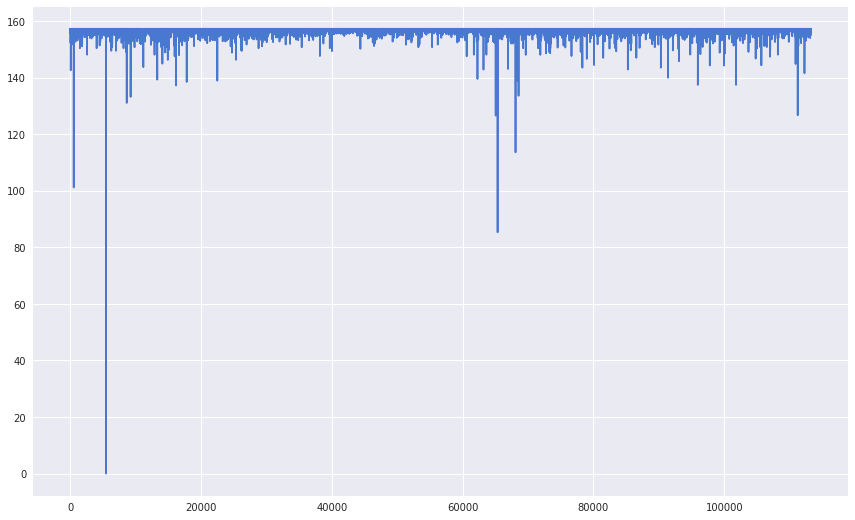

In [19]:
plt.plot(mashi_dis)
plt.show()

In [20]:
gtd_df['mdist']=mashi_dis

In [21]:
gtd_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113247 entries, 199801010001 to 201712310032
Data columns (total 41 columns):
iyear               113247 non-null int64
imonth              113247 non-null int64
iday                113247 non-null int64
country_txt         113247 non-null object
region_txt          113247 non-null object
latitude            113247 non-null float64
longitude           113247 non-null float64
specificity         113247 non-null float64
attacktype1_txt     113247 non-null object
targtype1_txt       113247 non-null object
targsubtype1_txt    113247 non-null object
natlty1_txt         113247 non-null object
gname               113247 non-null object
nperpcap            113247 non-null float64
weaptype1_txt       113247 non-null object
weapsubtype1_txt    113247 non-null object
nkill               113247 non-null float64
nkillus             113247 non-null float64
nkillter            113247 non-null float64
nwound              113247 non-null float64
nwoundu

In [22]:
gtd_add_mdis=gtd_df

In [23]:
gtd_add_mdis.to_csv('gtd_add_mdis_98to17.csv',sep=',')

In [41]:
gtd_add_mdis.mdist.describe()

count    113247.000000
mean        157.103603
std           0.884344
min           0.000000
25%         157.131801
50%         157.212000
75%         157.257827
max         157.257827
Name: mdist, dtype: float64

In [24]:
mdis_df=pd.DataFrame(mashi_dis)

In [25]:
mdis_df.describe()

,0
count,113247.000000
mean,157.103603
std,0.884344
min,0.000000
25%,157.131801
50%,157.212000
75%,157.257827
max,157.257827


In [26]:
from collections import Counter

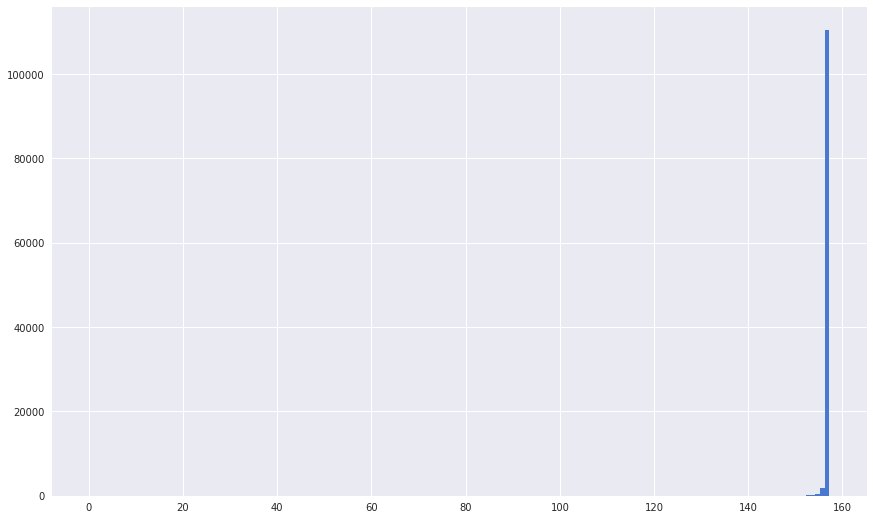

In [31]:
plt.hist(np.array(mdis_df),157)
plt.show()

In [252]:
for i in np.array(mdis_df):
    print(i)

[2660.8]
[2744.6]
[2744.4]
[2745.2]
[2745.]
[2744.4]
[2744.4]
[2745.2]
[2745.]
[2733.6]
[2700.]
[2734.4]
[2745.2]
[2744.4]
[2744.4]
[2745.2]
[2744.4]
[2744.4]
[2744.4]
[2736.4]
[2724.4]
[2743.6]
[2743.6]
[2745.2]
[2744.4]
[2725.2]
[2744.4]
[2744.4]
[2744.4]
[2744.4]
[2745.2]
[2743.6]
[2744.2]
[2745.2]
[2742.4]
[2745.2]
[2717.2]
[2745.2]
[2745.2]
[2745.2]
[2743.8]
[2744.4]
[2745.2]
[2745.]
[2745.2]
[2739.8]
[2742.8]
[2733.2]
[2744.4]
[2744.4]
[2745.2]
[2745.2]
[2745.2]
[2743.6]
[2745.2]
[2732.4]
[2743.6]
[2744.4]
[2744.4]
[2744.6]
[2742.8]
[2742.2]
[2731.8]
[2741.8]
[2743.8]
[2726.8]
[2745.2]
[2745.2]
[2728.4]
[2724.4]
[2745.2]
[2745.2]
[2730.2]
[2734.8]
[2738.]
[2735.6]
[2745.2]
[2743.6]
[2744.2]
[2745.2]
[2489.2]
[2739.2]
[2745.]
[2744.8]
[2741.2]
[2745.2]
[2744.4]
[2745.]
[2738.]
[2745.2]
[2744.4]
[2735.]
[2745.2]
[2742.4]
[2739.6]
[2743.]
[2743.4]
[2744.8]
[2742.8]
[2745.2]
[2743.6]
[2744.2]
[2744.4]
[2742.8]
[2744.4]
[2738.]
[2716.]
[2745.]
[2745.2]
[2745.2]
[2745.2]
[2745.2]
[2745

[2743.6]
[2745.2]
[2744.8]
[2745.2]
[2727.2]
[2742.8]
[2745.]
[2745.]
[2745.]
[2745.2]
[2745.2]
[2744.2]
[2743.]
[2743.]
[2745.]
[2745.2]
[2745.2]
[2733.8]
[2744.4]
[2745.2]
[2744.6]
[2744.4]
[2742.]
[2745.2]
[2745.2]
[2745.2]
[2743.2]
[2743.6]
[2743.2]
[2744.4]
[2743.4]
[2744.2]
[2743.2]
[2735.8]
[2732.]
[2739.4]
[2744.4]
[2745.2]
[2745.2]
[2745.2]
[2737.2]
[2744.4]
[2745.2]
[2737.8]
[2741.]
[2744.4]
[2744.4]
[2744.4]
[2742.2]
[2744.4]
[2745.2]
[2745.2]
[2744.4]
[2739.6]
[2721.4]
[2745.2]
[2745.2]
[2744.4]
[2745.2]
[2742.6]
[2745.2]
[2745.2]
[2744.6]
[2740.2]
[2743.6]
[2744.4]
[2734.8]
[2738.8]
[2745.2]
[2744.8]
[2744.4]
[2745.2]
[2743.6]
[2734.]
[2744.2]
[2744.8]
[2744.8]
[2745.2]
[2745.2]
[2745.2]
[2744.8]
[2745.2]
[2745.2]
[2745.2]
[2745.2]
[2745.2]
[2737.2]
[2744.4]
[2745.2]
[2745.2]
[2745.2]
[2745.2]
[2745.2]
[2745.2]
[2742.2]
[2711.6]
[2742.2]
[2741.2]
[2745.2]
[2745.]
[2738.6]
[2745.2]
[2745.2]
[2744.4]
[2742.8]
[2744.2]
[2745.2]
[2742.8]
[2743.6]
[2744.4]
[2674.]
[2742.8]
[274

[2745.2]
[2745.2]
[2745.2]
[2745.2]
[2738.4]
[2742.8]
[2745.2]
[2744.4]
[2728.4]
[2689.]
[2740.4]
[2738.]
[2743.6]
[2738.]
[2745.2]
[2741.]
[2745.2]
[2742.2]
[2745.2]
[2745.2]
[2745.2]
[2736.2]
[2740.2]
[2745.2]
[2743.8]
[2743.2]
[2745.2]
[2745.2]
[2744.]
[2743.4]
[2745.]
[2745.2]
[2745.2]
[2745.2]
[2743.8]
[2745.2]
[2741.6]
[2742.8]
[2744.4]
[2744.4]
[2743.2]
[2738.]
[2743.6]
[2742.8]
[2743.6]
[2744.4]
[2742.8]
[2745.2]
[2743.6]
[2740.2]
[2743.2]
[2745.2]
[2741.6]
[2745.2]
[2742.8]
[2743.6]
[2742.8]
[2745.]
[2742.]
[2744.6]
[2738.8]
[2743.6]
[2742.8]
[2743.4]
[2737.6]
[2740.4]
[2744.2]
[2742.]
[2745.2]
[2745.2]
[2744.4]
[2743.2]
[2740.6]
[2734.8]
[2745.]
[2740.6]
[2745.2]
[2744.2]
[2744.8]
[2733.]
[2743.2]
[2744.4]
[2741.]
[2745.]
[2744.4]
[2741.2]
[2744.6]
[2744.4]
[2743.6]
[2738.]
[2736.6]
[2745.2]
[2726.2]
[2745.2]
[2745.2]
[2738.6]
[2745.2]
[2741.2]
[2743.6]
[2739.8]
[2744.4]
[2745.2]
[2745.2]
[2745.2]
[2745.2]
[2745.2]
[2741.2]
[2744.8]
[2745.2]
[2745.2]
[2742.2]
[2743.4]
[2743.6

[2743.4]
[2740.]
[2745.2]
[2744.4]
[2739.6]
[2743.8]
[2744.2]
[2744.4]
[2735.2]
[2739.4]
[2738.8]
[2745.2]
[2744.4]
[2745.2]
[2744.6]
[2744.4]
[2744.4]
[2745.2]
[2744.6]
[2744.4]
[2744.4]
[2745.2]
[2745.2]
[2745.2]
[2743.6]
[2745.]
[2745.]
[2745.]
[2742.8]
[2745.2]
[2744.4]
[2744.4]
[2745.2]
[2742.6]
[2744.4]
[2745.2]
[2713.6]
[2742.6]
[2743.6]
[2740.6]
[2743.8]
[2743.]
[2745.2]
[2745.]
[2745.]
[2745.2]
[2745.2]
[2735.6]
[2745.2]
[2741.8]
[2745.2]
[2744.2]
[2736.]
[2745.]
[2745.2]
[2733.2]
[2744.2]
[2745.2]
[2744.4]
[2744.6]
[2738.8]
[2742.8]
[2745.2]
[2745.2]
[2745.]
[2741.4]
[2742.]
[2744.8]
[2740.8]
[2742.4]
[2745.2]
[2742.8]
[2745.2]
[2706.4]
[2734.4]
[2706.4]
[2741.2]
[2743.4]
[2714.4]
[2745.2]
[2744.2]
[2740.]
[2745.2]
[2744.4]
[2745.2]
[2745.2]
[2743.4]
[2745.]
[2744.4]
[2745.2]
[2744.4]
[2742.8]
[2745.2]
[2739.2]
[2744.6]
[2741.6]
[2745.2]
[2742.]
[2743.6]
[2745.2]
[2745.2]
[2714.8]
[2745.]
[2744.2]
[2736.8]
[2745.2]
[2743.2]
[2642.]
[2734.]
[2745.2]
[2744.4]
[2745.2]
[2745.2]


[2744.]
[2744.]
[2745.]
[2745.]
[2745.]
[2738.2]
[2745.2]
[2743.6]
[2734.]
[2744.4]
[2743.6]
[2726.]
[2743.2]
[2745.2]
[2745.]
[2743.4]
[2741.2]
[2745.2]
[2741.]
[2744.4]
[2743.6]
[2741.2]
[2744.2]
[2745.2]
[2743.4]
[2744.4]
[2745.2]
[2744.4]
[2744.2]
[2745.]
[2745.]
[2740.4]
[2742.]
[2744.4]
[2745.2]
[2745.]
[2745.2]
[2745.2]
[2744.2]
[2744.2]
[2744.2]
[2744.2]
[2744.2]
[2745.2]
[2742.]
[2744.8]
[2745.2]
[2745.2]
[2745.2]
[2743.2]
[2741.8]
[2736.4]
[2743.4]
[2743.2]
[2744.4]
[2742.]
[2742.]
[2740.4]
[2742.8]
[2744.4]
[2745.2]
[2744.6]
[2745.]
[2744.8]
[2745.2]
[2742.2]
[2740.4]
[2745.]
[2745.2]
[2745.2]
[2745.2]
[2745.2]
[2742.2]
[2745.2]
[2740.4]
[2742.6]
[2733.2]
[2745.2]
[2739.4]
[2737.8]
[2745.2]
[2742.2]
[2745.2]
[2745.2]
[2745.2]
[2745.2]
[2744.4]
[2742.6]
[2741.2]
[2745.2]
[2745.2]
[2743.6]
[2743.6]
[2743.6]
[2742.8]
[2739.6]
[2744.6]
[2744.4]
[2744.4]
[2744.4]
[2743.]
[2740.4]
[2744.4]
[2744.4]
[2742.4]
[2740.4]
[2741.6]
[2742.6]
[2744.8]
[2733.]
[2741.2]
[2744.4]
[2741.2]
[27

[2742.4]
[2745.2]
[2745.2]
[2745.2]
[2745.2]
[2745.2]
[2744.4]
[2744.4]
[2742.2]
[2744.4]
[2744.8]
[2745.2]
[2744.6]
[2741.]
[2745.2]
[2745.2]
[2739.2]
[2743.6]
[2745.2]
[2744.2]
[2745.2]
[2745.2]
[2745.2]
[2745.2]
[2744.2]
[2745.2]
[2738.8]
[2745.2]
[2745.2]
[2735.4]
[2742.6]
[2742.8]
[2745.2]
[2745.2]
[2742.8]
[2745.2]
[2743.6]
[2744.4]
[2745.2]
[2744.4]
[2744.4]
[2745.2]
[2745.2]
[2743.2]
[2745.2]
[2744.4]
[2744.4]
[2742.8]
[2745.2]
[2739.2]
[2744.4]
[2743.6]
[2743.6]
[2743.2]
[2734.8]
[2744.2]
[2745.2]
[2745.2]
[2745.2]
[2739.8]
[2745.2]
[2743.6]
[2745.2]
[2745.2]
[2745.2]
[2740.6]
[2745.]
[2745.]
[2745.2]
[2745.2]
[2745.2]
[2741.2]
[2745.2]
[2744.8]
[2745.2]
[2745.]
[2742.]
[2745.2]
[2744.4]
[2745.2]
[2745.2]
[2744.4]
[2730.4]
[2741.4]
[2743.6]
[2743.6]
[2743.6]
[2742.8]
[2744.]
[2744.8]
[2743.2]
[2743.6]
[2720.6]
[2745.2]
[2741.2]
[2745.2]
[2744.]
[2745.2]
[2745.2]
[2745.2]
[2744.4]
[2745.2]
[2742.]
[2737.2]
[2743.]
[2742.8]
[2687.2]
[2745.2]
[2738.4]
[2745.2]
[2745.2]
[2745.2]
[

[2738.4]
[2743.4]
[2743.8]
[2745.2]
[2745.2]
[2705.2]
[2744.]
[2743.4]
[2745.2]
[2743.4]
[2743.]
[2734.4]
[2745.2]
[2744.4]
[2740.8]
[2744.2]
[2742.8]
[2742.8]
[2739.8]
[2726.4]
[2745.2]
[2742.8]
[2739.2]
[2728.2]
[2744.2]
[2741.6]
[2743.6]
[2678.4]
[2678.6]
[2745.2]
[2740.8]
[2686.4]
[2688.8]
[2745.2]
[2736.8]
[2658.4]
[2742.]
[2745.]
[2707.6]
[2736.4]
[2739.]
[2741.8]
[2743.8]
[2743.]
[2743.6]
[2744.2]
[2744.2]
[2744.4]
[2740.8]
[2744.2]
[2737.2]
[2745.2]
[2745.2]
[2745.2]
[2715.6]
[2744.4]
[2724.]
[2745.2]
[2744.4]
[2744.2]
[2744.6]
[2726.8]
[2745.2]
[2726.8]
[2744.2]
[2744.4]
[2743.8]
[2652.4]
[2745.]
[2744.4]
[2744.4]
[2610.6]
[2744.4]
[2665.4]
[2684.]
[2744.4]
[2710.]
[2743.]
[2745.2]
[2740.4]
[2744.4]
[2743.6]
[2745.2]
[2735.6]
[2743.6]
[2745.]
[2744.4]
[2745.2]
[2743.6]
[2736.4]
[2734.4]
[2742.8]
[2742.8]
[2743.2]
[2745.2]
[2744.4]
[2740.8]
[2743.8]
[2742.4]
[2744.4]
[2742.8]
[2744.4]
[2625.6]
[2742.]
[2596.8]
[2640.]
[2745.2]
[2745.2]
[2605.6]
[2743.6]
[2731.6]
[2742.]
[2745.2

[2743.6]
[2745.2]
[2744.4]
[2744.2]
[2743.8]
[2745.2]
[2739.8]
[2744.4]
[2744.4]
[2743.6]
[2745.2]
[2744.4]
[2744.4]
[2727.8]
[2736.4]
[2744.4]
[2741.2]
[2744.4]
[2744.6]
[2745.2]
[2745.2]
[2745.2]
[2745.2]
[2744.4]
[2744.4]
[2744.4]
[2744.2]
[2745.2]
[2743.4]
[2736.]
[2744.4]
[2745.2]
[2736.4]
[2745.2]
[2743.6]
[2744.8]
[2743.2]
[2691.6]
[2742.8]
[2724.4]
[2745.2]
[2745.2]
[2745.2]
[2733.2]
[2745.2]
[2745.2]
[2743.2]
[2744.4]
[2744.8]
[2744.6]
[2742.2]
[2744.4]
[2745.2]
[2745.2]
[2740.8]
[2744.6]
[2744.8]
[2745.]
[2745.]
[2743.8]
[2745.2]
[2744.8]
[2743.]
[2745.2]
[2744.4]
[2741.2]
[2745.2]
[2743.8]
[2745.2]
[2743.6]
[2744.4]
[2745.2]
[2745.2]
[2745.2]
[2745.2]
[2734.8]
[2744.4]
[2744.4]
[2744.4]
[2744.4]
[2745.2]
[2745.2]
[2744.4]
[2742.8]
[2745.2]
[2744.2]
[2745.2]
[2741.2]
[2704.4]
[2744.4]
[2744.4]
[2744.4]
[2744.4]
[2745.2]
[2745.2]
[2745.2]
[2743.8]
[2741.8]
[2745.2]
[2743.]
[2744.4]
[2741.6]
[2741.6]
[2742.8]
[2743.4]
[2744.8]
[2744.2]
[2745.2]
[2745.2]
[2745.2]
[2745.2]
[2740.

[2741.6]
[2744.8]
[2742.]
[2743.6]
[2744.4]
[2744.6]
[2744.4]
[2743.6]
[2744.4]
[2745.2]
[2745.2]
[2744.4]
[2745.2]
[2742.6]
[2741.6]
[2745.2]
[2745.2]
[2742.4]
[2745.2]
[2745.2]
[2741.4]
[2744.4]
[2745.2]
[2745.2]
[2744.4]
[2742.2]
[2731.6]
[2745.]
[2735.6]
[2745.2]
[2744.]
[2744.4]
[2741.6]
[2735.4]
[2741.4]
[2744.4]
[2743.6]
[2744.6]
[2744.]
[2745.2]
[2743.6]
[2744.2]
[2745.]
[2728.4]
[2729.2]
[2729.2]
[2745.2]
[2742.8]
[2745.2]
[2745.2]
[2745.2]
[2742.8]
[2670.2]
[2744.2]
[2744.4]
[2740.8]
[2744.4]
[2745.2]
[2744.2]
[2744.2]
[2743.]
[2745.]
[2719.2]
[2745.2]
[2735.6]
[2745.]
[2743.8]
[2740.6]
[2737.6]
[2716.4]
[2740.]
[2743.8]
[2736.8]
[2738.8]
[2744.4]
[2745.]
[2744.4]
[2744.4]
[2744.4]
[2743.2]
[2722.4]
[2722.6]
[2721.8]
[2737.]
[2736.2]
[2712.2]
[2736.8]
[2743.2]
[2744.4]
[2743.6]
[2737.2]
[2743.2]
[2744.4]
[2742.4]
[2744.4]
[2742.8]
[2745.2]
[2742.]
[2743.6]
[2743.]
[2739.4]
[2745.2]
[2745.2]
[2740.4]
[2731.6]
[2734.6]
[2741.2]
[2744.4]
[2744.4]
[2744.4]
[2737.]
[2745.]
[2743.8

[2744.8]
[2745.2]
[2745.2]
[2745.2]
[2738.8]
[2738.4]
[2736.4]
[2721.4]
[2744.4]
[2744.4]
[2744.4]
[2741.]
[2645.6]
[2744.8]
[2745.2]
[2738.2]
[2742.]
[2744.6]
[2744.4]
[2744.4]
[2743.8]
[2743.6]
[2743.6]
[2743.2]
[2744.2]
[2743.8]
[2745.2]
[2745.2]
[2742.8]
[2743.4]
[2742.6]
[2744.8]
[2745.2]
[2740.4]
[2742.4]
[2742.4]
[2734.]
[2726.2]
[2744.4]
[2745.2]
[2734.6]
[2744.4]
[2743.2]
[2741.2]
[2745.2]
[2738.8]
[2742.]
[2734.]
[2734.8]
[2730.8]
[2735.2]
[2742.]
[2740.4]
[2744.8]
[2741.]
[2744.6]
[2742.6]
[2739.2]
[2744.4]
[2742.]
[2720.4]
[2744.4]
[2744.2]
[2734.]
[2744.]
[2734.]
[2742.]
[2741.6]
[2744.8]
[2745.2]
[2721.2]
[2734.]
[2744.]
[2743.6]
[2741.2]
[2737.6]
[2742.8]
[2745.2]
[2745.]
[2744.4]
[2742.8]
[2743.4]
[2744.4]
[2744.8]
[2744.]
[2745.2]
[2745.2]
[2744.4]
[2745.]
[2745.2]
[2744.4]
[2744.8]
[2745.2]
[2743.6]
[2744.4]
[2744.4]
[2744.4]
[2745.]
[2745.]
[2745.2]
[2745.2]
[2744.4]
[2745.2]
[2744.4]
[2745.]
[2740.4]
[2745.2]
[2738.4]
[2744.8]
[2744.4]
[2742.8]
[2744.]
[2745.2]
[274

[2741.6]
[2725.]
[2733.8]
[2739.6]
[2740.4]
[2743.6]
[2744.6]
[2744.2]
[2736.4]
[2743.6]
[2744.6]
[2745.2]
[2745.2]
[2742.8]
[2740.4]
[2744.6]
[2739.2]
[2733.2]
[2728.4]
[2744.4]
[2734.8]
[2741.]
[2743.2]
[2741.8]
[2741.8]
[2745.]
[2737.2]
[2745.2]
[2744.4]
[2743.2]
[2742.]
[2665.2]
[2745.2]
[2745.2]
[2744.4]
[2744.6]
[2744.8]
[2727.2]
[2745.2]
[2743.6]
[2742.2]
[2741.]
[2744.4]
[2742.]
[2744.4]
[2744.6]
[2744.4]
[2744.6]
[2740.6]
[2743.4]
[2743.2]
[2744.4]
[2742.4]
[2733.2]
[2738.]
[2744.8]
[2744.4]
[2744.4]
[2745.]
[2745.]
[2723.4]
[2744.4]
[2745.2]
[2742.6]
[2741.2]
[2735.8]
[2742.4]
[2744.6]
[2744.8]
[2743.8]
[2744.4]
[2744.4]
[2729.2]
[2744.4]
[2743.6]
[2692.8]
[2744.6]
[2744.8]
[2745.2]
[2744.4]
[2742.8]
[2744.8]
[2743.8]
[2745.]
[2741.]
[2742.]
[2745.2]
[2741.2]
[2703.2]
[2744.]
[2744.8]
[2745.2]
[2743.2]
[2744.8]
[2744.6]
[2739.6]
[2666.4]
[2743.]
[2743.]
[2744.4]
[2745.2]
[2730.8]
[2743.2]
[2744.4]
[2731.2]
[2744.4]
[2745.]
[2745.2]
[2735.6]
[2744.2]
[2739.6]
[2742.8]
[2744.4]

[2744.6]
[2742.8]
[2745.]
[2743.4]
[2742.]
[2744.4]
[2743.4]
[2738.]
[2745.]
[2744.4]
[2744.4]
[2740.4]
[2745.2]
[2743.]
[2742.4]
[2744.2]
[2730.8]
[2744.4]
[2744.]
[2745.]
[2738.8]
[2743.6]
[2742.2]
[2745.2]
[2742.2]
[2728.2]
[2744.4]
[2744.4]
[2744.]
[2742.8]
[2738.8]
[2743.2]
[2743.8]
[2745.2]
[2745.2]
[2743.6]
[2725.4]
[2721.8]
[2743.]
[2745.2]
[2743.2]
[2743.2]
[2743.2]
[2675.]
[2745.2]
[2741.4]
[2744.]
[2742.]
[2741.6]
[2744.4]
[2742.2]
[2741.4]
[2740.4]
[2745.2]
[2745.2]
[2744.2]
[2739.]
[2742.4]
[2692.4]
[2744.2]
[2745.2]
[2685.8]
[2737.4]
[2744.4]
[2714.8]
[2742.]
[2739.4]
[2708.]
[2743.8]
[2745.2]
[2734.8]
[2743.6]
[2745.2]
[2744.4]
[2736.4]
[2743.8]
[2745.2]
[2745.2]
[2729.4]
[2743.]
[2744.4]
[2739.6]
[2744.6]
[2745.]
[2745.2]
[2743.8]
[2745.2]
[2745.2]
[2742.4]
[2745.2]
[2744.2]
[2745.2]
[2741.2]
[2744.4]
[2731.8]
[2705.2]
[2740.6]
[2743.6]
[2744.4]
[2744.4]
[2742.6]
[2744.]
[2737.2]
[2712.4]
[2742.6]
[2742.2]
[2743.4]
[2741.2]
[2744.]
[2744.4]
[2743.8]
[2720.6]
[2730.8]
[2

[2744.8]
[2745.2]
[2745.2]
[2745.2]
[2743.]
[2744.8]
[2744.8]
[2742.8]
[2744.4]
[2742.8]
[2745.2]
[2737.]
[2744.4]
[2743.6]
[2745.2]
[2744.4]
[2742.4]
[2744.2]
[2741.6]
[2739.]
[2745.2]
[2742.6]
[2745.2]
[2745.2]
[2745.2]
[2745.2]
[2745.2]
[2739.4]
[2745.2]
[2745.2]
[2744.4]
[2742.8]
[2743.2]
[2743.8]
[2742.2]
[2743.4]
[2739.4]
[2744.4]
[2744.4]
[2745.2]
[2744.8]
[2742.]
[2745.2]
[2706.]
[2743.2]
[2742.8]
[2737.2]
[2745.2]
[2745.2]
[2744.4]
[2743.4]
[2642.]
[2743.4]
[2745.2]
[2743.6]
[2745.2]
[2717.6]
[2744.4]
[2737.2]
[2745.2]
[2745.]
[2743.4]
[2724.6]
[2745.]
[2743.6]
[2744.4]
[2744.4]
[2744.2]
[2740.]
[2743.2]
[2745.2]
[2745.2]
[2728.6]
[2722.4]
[2738.]
[2731.8]
[2740.4]
[2745.2]
[2738.6]
[2745.2]
[2743.6]
[2745.2]
[2742.4]
[2745.2]
[2737.2]
[2739.2]
[2739.2]
[2743.6]
[2741.8]
[2741.2]
[2742.8]
[2743.6]
[2744.4]
[2717.6]
[2744.2]
[2744.6]
[2745.2]
[2745.2]
[2724.8]
[2737.2]
[2744.]
[2745.2]
[2744.4]
[2744.4]
[2744.4]
[2745.2]
[2741.4]
[2742.4]
[2744.4]
[2736.8]
[2743.2]
[2744.4]
[27

[2745.]
[2744.4]
[2744.4]
[2744.6]
[2744.4]
[2745.2]
[2743.6]
[2745.2]
[2745.2]
[2744.4]
[2739.8]
[2744.6]
[2744.8]
[2743.6]
[2741.2]
[2743.6]
[2745.2]
[2740.4]
[2744.]
[2744.4]
[2745.2]
[2742.4]
[2745.2]
[2741.2]
[2733.]
[2738.2]
[2739.6]
[2744.4]
[2744.6]
[2745.]
[2744.8]
[2744.6]
[2743.8]
[2743.6]
[2744.4]
[2741.4]
[2744.]
[2744.8]
[2744.4]
[2643.2]
[2742.8]
[2744.4]
[2744.4]
[2745.2]
[2736.]
[2743.4]
[2742.]
[2745.2]
[2745.2]
[2744.2]
[2745.2]
[2744.4]
[2744.4]
[2745.2]
[2742.8]
[2743.6]
[2733.2]
[2743.]
[2742.8]
[2744.4]
[2728.4]
[2742.8]
[2743.2]
[2744.4]
[2742.8]
[2742.2]
[2743.4]
[2742.6]
[2744.4]
[2744.4]
[2744.4]
[2744.]
[2741.2]
[2743.6]
[2743.6]
[2745.2]
[2744.4]
[2742.8]
[2743.8]
[2743.8]
[2744.4]
[2745.]
[2744.6]
[2745.]
[2744.8]
[2744.8]
[2740.]
[2744.4]
[2744.4]
[2745.2]
[2744.8]
[2745.2]
[2745.2]
[2741.4]
[2734.]
[2743.2]
[2745.2]
[2743.]
[2744.4]
[2743.6]
[2745.2]
[2745.2]
[2743.]
[2745.]
[2744.8]
[2744.8]
[2744.6]
[2744.6]
[2727.2]
[2727.2]
[2738.8]
[2723.4]
[2739.6]

[2745.2]
[2744.]
[2743.2]
[2744.4]
[2743.2]
[2744.4]
[2744.4]
[2745.2]
[2734.2]
[2739.6]
[2745.2]
[2745.2]
[2745.2]
[2745.2]
[2745.2]
[2745.2]
[2745.2]
[2745.2]
[2745.2]
[2745.2]
[2744.8]
[2744.]
[2738.6]
[2744.4]
[2743.6]
[2745.2]
[2736.8]
[2743.2]
[2744.2]
[2744.4]
[2731.8]
[2745.]
[2745.2]
[2738.2]
[2745.]
[2745.2]
[2745.2]
[2744.]
[2744.4]
[2740.4]
[2745.2]
[2745.2]
[2745.2]
[2745.2]
[2744.4]
[2744.4]
[2741.4]
[2743.2]
[2744.4]
[2743.8]
[2740.6]
[2745.2]
[2745.2]
[2741.2]
[2744.8]
[2745.2]
[2695.6]
[2745.2]
[2745.]
[2744.4]
[2740.4]
[2745.2]
[2744.]
[2742.]
[2744.4]
[2742.8]
[2745.]
[2744.2]
[2744.4]
[2742.]
[2743.]
[2744.2]
[2738.4]
[2744.6]
[2744.4]
[2745.2]
[2745.2]
[2745.2]
[2744.4]
[2745.2]
[2743.6]
[2745.2]
[2745.2]
[2744.4]
[2745.2]
[2744.2]
[2742.]
[2739.6]
[2745.2]
[2736.]
[2744.4]
[2744.4]
[2738.6]
[2745.2]
[2745.2]
[2743.6]
[2734.6]
[2745.2]
[2745.2]
[2745.2]
[2744.2]
[2743.4]
[2739.2]
[2743.2]
[2730.8]
[2743.4]
[2744.]
[2744.4]
[2745.2]
[2745.]
[2745.2]
[2734.]
[2695.6]

[2745.2]
[2740.4]
[2745.2]
[2744.4]
[2745.2]
[2744.4]
[2745.]
[2745.2]
[2744.4]
[2742.]
[2745.2]
[2745.2]
[2745.2]
[2737.2]
[2745.2]
[2735.2]
[2744.4]
[2745.2]
[2744.]
[2744.4]
[2742.2]
[2745.2]
[2745.2]
[2745.2]
[2743.4]
[2744.4]
[2744.2]
[2744.4]
[2745.2]
[2744.4]
[2745.2]
[2745.2]
[2745.2]
[2745.2]
[2745.2]
[2744.8]
[2744.6]
[2745.2]
[2745.2]
[2744.4]
[2744.6]
[2742.]
[2741.8]
[2742.8]
[2745.2]
[2745.2]
[2744.8]
[2745.2]
[2740.8]
[2744.2]
[2745.2]
[2744.2]
[2744.4]
[2743.6]
[2721.2]
[2743.]
[2670.6]
[2745.2]
[2734.8]
[2745.2]
[2743.6]
[2741.4]
[2742.4]
[2744.4]
[2745.2]
[2744.4]
[2744.4]
[2744.]
[2744.]
[2744.]
[2744.]
[2744.]
[2744.]
[2742.8]
[2744.8]
[2745.]
[2744.8]
[2744.4]
[2744.4]
[2742.8]
[2732.4]
[2745.2]
[2744.4]
[2745.2]
[2743.6]
[2742.6]
[2745.2]
[2744.4]
[2743.8]
[2744.6]
[2744.4]
[2745.2]
[2745.2]
[2742.2]
[2744.4]
[2745.2]
[2740.6]
[2745.]
[2744.4]
[2745.2]
[2745.2]
[2745.2]
[2743.8]
[2745.2]
[2738.8]
[2745.2]
[2744.6]
[2737.]
[2745.2]
[2744.4]
[2740.]
[2745.2]
[2744.4

[2744.4]
[2744.4]
[2744.4]
[2743.6]
[2744.2]
[2744.8]
[2744.2]
[2744.8]
[2743.6]
[2742.2]
[2740.]
[2745.2]
[2745.2]
[2745.2]
[2745.2]
[2745.2]
[2744.6]
[2744.4]
[2745.2]
[2744.6]
[2744.4]
[2744.4]
[2745.2]
[2742.]
[2743.2]
[2745.2]
[2745.2]
[2715.2]
[2744.4]
[2745.2]
[2745.2]
[2742.6]
[2744.4]
[2741.6]
[2744.8]
[2745.2]
[2743.6]
[2742.]
[2745.]
[2742.2]
[2745.2]
[2744.]
[2745.2]
[2745.2]
[2745.2]
[2744.4]
[2743.8]
[2745.]
[2743.2]
[2739.8]
[2745.2]
[2742.2]
[2745.2]
[2726.8]
[2742.8]
[2745.2]
[2744.6]
[2739.]
[2745.2]
[2745.2]
[2738.]
[2745.2]
[2745.2]
[2744.4]
[2745.2]
[2737.4]
[2744.4]
[2718.6]
[2745.2]
[2745.2]
[2742.]
[2735.6]
[2743.6]
[2744.4]
[2744.]
[2745.2]
[2745.2]
[2744.8]
[2745.2]
[2744.4]
[2745.]
[2741.8]
[2745.]
[2731.2]
[2745.2]
[2745.2]
[2745.2]
[2744.8]
[2733.8]
[2745.2]
[2743.]
[2745.2]
[2745.2]
[2745.2]
[2745.2]
[2745.2]
[2740.8]
[2744.4]
[2745.2]
[2745.2]
[2745.2]
[2744.4]
[2745.2]
[2744.4]
[2744.4]
[2745.2]
[2745.2]
[2745.2]
[2745.2]
[2745.2]
[2745.2]
[2745.2]
[2745

[2744.]
[2742.8]
[2745.2]
[2744.4]
[2745.2]
[2745.2]
[2742.2]
[2742.8]
[2745.]
[2744.]
[2744.4]
[2745.]
[2744.2]
[2745.2]
[2740.4]
[2744.4]
[2745.2]
[2741.2]
[2745.2]
[2744.]
[2745.2]
[2736.]
[2745.2]
[2745.2]
[2742.8]
[2735.8]
[2745.2]
[2744.4]
[2745.]
[2744.6]
[2743.8]
[2743.8]
[2743.]
[2745.2]
[2745.]
[2743.2]
[2745.2]
[2743.6]
[2744.8]
[2743.4]
[2744.4]
[2745.2]
[2744.4]
[2744.4]
[2745.2]
[2745.2]
[2745.2]
[2745.2]
[2745.2]
[2739.]
[2744.4]
[2744.6]
[2744.2]
[2742.8]
[2743.]
[2745.2]
[2745.2]
[2745.]
[2745.2]
[2745.2]
[2744.6]
[2744.8]
[2744.8]
[2743.6]
[2743.6]
[2744.2]
[2744.4]
[2745.2]
[2744.4]
[2745.2]
[2744.4]
[2744.8]
[2744.4]
[2745.2]
[2717.8]
[2744.4]
[2745.2]
[2745.]
[2745.2]
[2744.4]
[2743.4]
[2744.4]
[2743.6]
[2744.4]
[2745.2]
[2744.4]
[2743.2]
[2744.4]
[2745.2]
[2744.4]
[2744.4]
[2743.6]
[2744.4]
[2745.2]
[2745.2]
[2745.2]
[2740.4]
[2740.2]
[2744.4]
[2745.2]
[2745.2]
[2742.8]
[2745.2]
[2745.2]
[2745.2]
[2744.4]
[2745.2]
[2745.2]
[2745.2]
[2745.2]
[2744.4]
[2745.2]
[2744

[2744.4]
[2743.6]
[2744.4]
[2742.6]
[2744.6]
[2744.4]
[2742.]
[2744.4]
[2744.4]
[2742.2]
[2745.2]
[2745.]
[2744.8]
[2745.2]
[2745.2]
[2744.4]
[2743.]
[2744.4]
[2743.2]
[2745.]
[2745.2]
[2745.2]
[2744.4]
[2736.8]
[2745.2]
[2739.8]
[2744.2]
[2745.2]
[2745.2]
[2743.6]
[2744.4]
[2744.4]
[2743.6]
[2744.4]
[2745.2]
[2717.6]
[2745.2]
[2745.2]
[2744.4]
[2745.2]
[2744.6]
[2745.2]
[2744.4]
[2744.4]
[2743.2]
[2744.4]
[2744.4]
[2745.2]
[2745.2]
[2744.8]
[2744.6]
[2744.4]
[2745.2]
[2745.2]
[2745.2]
[2745.2]
[2745.2]
[2745.2]
[2745.2]
[2745.2]
[2745.2]
[2745.2]
[2745.2]
[2745.2]
[2742.6]
[2745.2]
[2745.]
[2745.2]
[2744.4]
[2745.2]
[2744.8]
[2745.2]
[2744.4]
[2745.2]
[2742.2]
[2745.]
[2743.2]
[2730.6]
[2745.2]
[2745.2]
[2745.2]
[2745.2]
[2745.2]
[2743.6]
[2744.]
[2744.2]
[2743.4]
[2745.2]
[2745.2]
[2745.2]
[2745.2]
[2745.2]
[2745.2]
[2745.2]
[2745.2]
[2744.4]
[2745.2]
[2742.8]
[2742.]
[2743.6]
[2745.]
[2744.4]
[2744.4]
[2745.2]
[2744.4]
[2744.4]
[2744.]
[2745.2]
[2745.]
[2744.8]
[2744.]
[2743.8]
[274

[2743.2]
[2730.8]
[2744.2]
[2744.4]
[2744.4]
[2745.2]
[2745.2]
[2742.8]
[2736.4]
[2744.6]
[2745.]
[2744.4]
[2744.6]
[2742.4]
[2745.2]
[2745.2]
[2745.2]
[2744.8]
[2745.2]
[2745.2]
[2745.2]
[2745.2]
[2735.2]
[2745.2]
[2741.]
[2745.2]
[2744.4]
[2744.4]
[2744.4]
[2745.2]
[2742.8]
[2744.]
[2735.6]
[2745.2]
[2744.2]
[2744.4]
[2744.4]
[2745.2]
[2745.]
[2744.8]
[2745.2]
[2745.2]
[2745.2]
[2745.2]
[2742.8]
[2745.2]
[2744.]
[2745.2]
[2728.4]
[2742.]
[2745.2]
[2735.6]
[2743.6]
[2744.8]
[2744.4]
[2726.8]
[2744.]
[2743.]
[2744.4]
[2738.]
[2744.4]
[2743.6]
[2745.2]
[2745.2]
[2745.2]
[2744.]
[2744.6]
[2745.2]
[2745.2]
[2743.8]
[2744.4]
[2744.4]
[2743.8]
[2744.8]
[2745.2]
[2744.4]
[2741.]
[2727.6]
[2737.2]
[2745.2]
[2745.2]
[2745.2]
[2744.4]
[2743.8]
[2736.2]
[2745.2]
[2745.2]
[2738.]
[2744.4]
[2744.4]
[2744.2]
[2744.4]
[2740.4]
[2636.6]
[2735.6]
[2745.2]
[2745.2]
[2745.]
[2743.6]
[2743.8]
[2745.2]
[2744.2]
[2727.4]
[2742.4]
[2744.]
[2734.4]
[2743.6]
[2743.8]
[2744.8]
[2745.2]
[2745.2]
[2741.2]
[2728.

[2743.6]
[2743.6]
[2744.4]
[2744.6]
[2744.8]
[2744.6]
[2743.6]
[2745.2]
[2745.]
[2745.2]
[2713.4]
[2745.2]
[2745.2]
[2744.2]
[2744.8]
[2744.4]
[2745.2]
[2741.]
[2744.4]
[2743.2]
[2743.8]
[2744.2]
[2743.6]
[2742.]
[2744.]
[2743.6]
[2744.4]
[2742.8]
[2743.4]
[2744.2]
[2742.8]
[2745.2]
[2744.4]
[2744.2]
[2745.]
[2744.4]
[2743.2]
[2740.4]
[2745.2]
[2744.8]
[2745.2]
[2744.8]
[2745.2]
[2744.4]
[2745.2]
[2744.]
[2744.4]
[2744.]
[2745.2]
[2744.2]
[2742.8]
[2745.2]
[2744.2]
[2744.6]
[2745.2]
[2745.2]
[2745.2]
[2744.4]
[2732.4]
[2745.2]
[2745.2]
[2745.2]
[2743.6]
[2744.8]
[2744.4]
[2744.4]
[2745.2]
[2738.]
[2745.2]
[2745.2]
[2744.2]
[2741.]
[2745.2]
[2744.4]
[2744.6]
[2744.2]
[2744.4]
[2745.2]
[2744.8]
[2745.2]
[2745.2]
[2736.]
[2745.2]
[2743.2]
[2744.4]
[2744.2]
[2745.]
[2741.6]
[2742.6]
[2745.2]
[2739.6]
[2741.8]
[2745.2]
[2744.]
[2745.2]
[2745.2]
[2744.4]
[2744.]
[2737.4]
[2745.2]
[2745.2]
[2745.]
[2744.4]
[2744.4]
[2739.2]
[2739.]
[2745.2]
[2745.2]
[2744.4]
[2745.2]
[2733.8]
[2731.8]
[2744.4

[2745.2]
[2745.2]
[2744.4]
[2744.4]
[2744.2]
[2742.6]
[2743.4]
[2745.2]
[2744.6]
[2744.6]
[2744.8]
[2744.4]
[2744.8]
[2690.4]
[2742.8]
[2743.6]
[2744.]
[2744.4]
[2744.4]
[2741.2]
[2743.6]
[2744.4]
[2741.2]
[2744.4]
[2744.4]
[2745.2]
[2744.4]
[2745.2]
[2743.2]
[2745.2]
[2744.4]
[2745.2]
[2745.2]
[2743.4]
[2744.8]
[2744.4]
[2744.6]
[2745.]
[2745.2]
[2745.]
[2686.]
[2745.2]
[2745.2]
[2745.2]
[2745.]
[2744.4]
[2743.6]
[2743.8]
[2744.6]
[2745.2]
[2735.4]
[2744.4]
[2745.]
[2744.]
[2744.4]
[2745.2]
[2744.4]
[2745.2]
[2744.4]
[2745.2]
[2745.]
[2745.2]
[2745.2]
[2744.4]
[2745.2]
[2745.2]
[2744.4]
[2742.]
[2744.4]
[2745.]
[2741.4]
[2684.4]
[2743.6]
[2744.4]
[2736.6]
[2745.]
[2744.4]
[2745.2]
[2725.8]
[2730.8]
[2745.2]
[2745.2]
[2745.2]
[2745.2]
[2744.4]
[2733.2]
[2745.]
[2745.]
[2744.4]
[2744.]
[2745.2]
[2745.]
[2745.2]
[2745.]
[2744.6]
[2743.8]
[2743.8]
[2744.2]
[2745.2]
[2744.6]
[2745.2]
[2744.4]
[2745.2]
[2745.2]
[2744.4]
[2744.8]
[2744.8]
[2744.4]
[2744.]
[2745.2]
[2745.2]
[2741.2]
[2745.2]


[2744.]
[2745.2]
[2745.]
[2739.2]
[2743.6]
[2745.2]
[2745.2]
[2745.2]
[2745.2]
[2745.2]
[2744.4]
[2745.]
[2745.2]
[2745.2]
[2742.2]
[2744.4]
[2745.2]
[2745.2]
[2744.8]
[2744.4]
[2745.2]
[2744.6]
[2744.6]
[2745.2]
[2744.]
[2745.2]
[2744.4]
[2741.2]
[2735.2]
[2745.2]
[2739.]
[2743.8]
[2739.]
[2735.2]
[2745.2]
[2744.2]
[2745.]
[2745.2]
[2744.4]
[2745.]
[2745.]
[2741.2]
[2745.2]
[2743.]
[2743.6]
[2745.2]
[2744.4]
[2742.]
[2744.4]
[2745.]
[2745.2]
[2745.2]
[2744.4]
[2744.8]
[2740.6]
[2745.2]
[2745.2]
[2745.2]
[2744.8]
[2741.2]
[2743.4]
[2745.2]
[2745.2]
[2743.6]
[2745.2]
[2745.]
[2741.6]
[2740.4]
[2744.4]
[2698.6]
[2745.]
[2745.2]
[2738.]
[2744.4]
[2745.]
[2745.]
[2744.4]
[2744.4]
[2744.4]
[2740.4]
[2745.2]
[2745.2]
[2744.4]
[2745.2]
[2744.4]
[2744.4]
[2745.2]
[2745.2]
[2745.2]
[2745.2]
[2745.2]
[2745.2]
[2744.4]
[2744.2]
[2744.4]
[2744.2]
[2742.8]
[2742.8]
[2745.2]
[2745.2]
[2745.2]
[2745.2]
[2745.2]
[2726.2]
[2745.2]
[2745.2]
[2744.4]
[2744.4]
[2744.4]
[2742.8]
[2745.2]
[2745.2]
[2744.8]


[2744.4]
[2744.4]
[2741.2]
[2744.8]
[2744.4]
[2745.2]
[2745.2]
[2744.4]
[2745.2]
[2740.4]
[2743.4]
[2745.2]
[2744.4]
[2743.6]
[2742.]
[2744.4]
[2745.2]
[2744.2]
[2744.4]
[2745.2]
[2744.4]
[2744.2]
[2745.2]
[2745.2]
[2743.6]
[2745.2]
[2744.4]
[2740.8]
[2745.2]
[2745.]
[2743.]
[2743.6]
[2745.2]
[2743.8]
[2745.2]
[2741.2]
[2744.4]
[2738.]
[2745.2]
[2745.2]
[2742.6]
[2742.]
[2745.2]
[2745.2]
[2744.4]
[2735.4]
[2740.2]
[2741.4]
[2740.]
[2735.6]
[2700.4]
[2742.8]
[2744.4]
[2744.2]
[2744.2]
[2730.4]
[2742.]
[2745.2]
[2745.2]
[2744.4]
[2744.6]
[2745.2]
[2744.2]
[2745.2]
[2745.]
[2745.]
[2741.6]
[2738.6]
[2744.4]
[2742.8]
[2742.6]
[2744.8]
[2745.]
[2745.2]
[2745.2]
[2743.6]
[2737.4]
[2737.4]
[2744.8]
[2745.2]
[2740.4]
[2745.2]
[2745.2]
[2744.4]
[2745.]
[2744.2]
[2744.4]
[2734.6]
[2745.2]
[2741.2]
[2744.]
[2745.2]
[2745.2]
[2744.8]
[2738.4]
[2745.]
[2744.4]
[2743.6]
[2744.4]
[2744.4]
[2745.2]
[2745.2]
[2745.2]
[2744.4]
[2744.8]
[2738.6]
[2745.2]
[2744.4]
[2740.4]
[2739.6]
[2745.2]
[2744.4]
[2743

[2741.6]
[2745.2]
[2745.2]
[2744.2]
[2745.2]
[2745.2]
[2745.2]
[2744.4]
[2744.6]
[2744.4]
[2744.6]
[2743.8]
[2743.2]
[2744.4]
[2744.8]
[2745.]
[2745.2]
[2744.4]
[2745.2]
[2743.6]
[2743.6]
[2744.4]
[2744.4]
[2742.4]
[2745.2]
[2745.2]
[2745.2]
[2744.4]
[2745.2]
[2745.2]
[2742.4]
[2744.4]
[2745.2]
[2745.2]
[2739.8]
[2744.6]
[2744.4]
[2745.]
[2744.4]
[2742.8]
[2743.8]
[2742.8]
[2743.6]
[2744.2]
[2744.]
[2744.8]
[2743.6]
[2743.6]
[2745.2]
[2744.4]
[2743.8]
[2743.6]
[2744.2]
[2745.2]
[2742.]
[2742.]
[2745.]
[2745.2]
[2745.]
[2745.2]
[2745.2]
[2745.2]
[2745.]
[2745.]
[2744.4]
[2744.8]
[2745.]
[2745.]
[2743.6]
[2745.2]
[2744.4]
[2745.2]
[2743.6]
[2710.4]
[2744.6]
[2745.2]
[2745.2]
[2745.2]
[2744.4]
[2744.4]
[2744.4]
[2742.8]
[2741.8]
[2742.2]
[2745.2]
[2744.4]
[2680.2]
[2742.8]
[2744.4]
[2744.4]
[2744.8]
[2745.2]
[2683.8]
[2743.8]
[2744.2]
[2745.2]
[2745.2]
[2742.4]
[2745.2]
[2745.2]
[2744.2]
[2744.4]
[2745.]
[2745.2]
[2745.2]
[2745.2]
[2745.2]
[2744.4]
[2745.2]
[2744.4]
[2745.2]
[2745.2]
[274

[2745.]
[2745.]
[2745.2]
[2744.4]
[2726.6]
[2743.4]
[2742.4]
[2738.4]
[2738.]
[2743.6]
[2742.4]
[2744.4]
[2737.2]
[2741.6]
[2744.8]
[2743.6]
[2745.]
[2744.4]
[2745.2]
[2745.2]
[2743.8]
[2742.]
[2743.6]
[2744.4]
[2744.6]
[2745.2]
[2745.2]
[2745.2]
[2745.2]
[2744.4]
[2745.2]
[2744.6]
[2744.4]
[2744.8]
[2745.2]
[2745.2]
[2745.2]
[2745.2]
[2745.2]
[2745.2]
[2745.2]
[2745.2]
[2745.2]
[2744.4]
[2744.4]
[2744.4]
[2745.2]
[2745.2]
[2744.4]
[2743.6]
[2744.4]
[2744.4]
[2745.2]
[2745.2]
[2733.6]
[2730.8]
[2742.8]
[2743.]
[2734.8]
[2745.2]
[2744.]
[2745.]
[2744.6]
[2743.6]
[2744.8]
[2745.]
[2743.8]
[2744.4]
[2744.2]
[2745.]
[2744.4]
[2742.4]
[2745.2]
[2745.2]
[2743.8]
[2742.8]
[2745.2]
[2743.6]
[2745.2]
[2745.2]
[2745.2]
[2742.2]
[2745.2]
[2745.]
[2744.4]
[2744.4]
[2745.]
[2745.]
[2744.]
[2737.4]
[2743.2]
[2744.4]
[2740.4]
[2745.2]
[2745.2]
[2744.4]
[2745.2]
[2743.8]
[2744.4]
[2743.6]
[2740.]
[2744.2]
[2744.4]
[2744.4]
[2743.4]
[2744.4]
[2745.2]
[2744.4]
[2744.4]
[2744.4]
[2745.2]
[2745.2]
[2745.2

[2744.6]
[2744.]
[2745.2]
[2745.2]
[2745.2]
[2745.2]
[2744.4]
[2744.8]
[2744.4]
[2742.6]
[2745.2]
[2742.6]
[2742.8]
[2745.2]
[2745.2]
[2745.2]
[2733.2]
[2745.2]
[2744.4]
[2745.2]
[2745.2]
[2745.2]
[2745.2]
[2744.8]
[2742.8]
[2743.8]
[2744.]
[2744.4]
[2744.2]
[2740.]
[2744.2]
[2744.4]
[2745.2]
[2745.2]
[2744.4]
[2745.]
[2745.]
[2745.2]
[2745.2]
[2739.2]
[2745.2]
[2713.4]
[2745.2]
[2744.]
[2744.4]
[2743.4]
[2744.4]
[2744.4]
[2742.]
[2745.2]
[2745.2]
[2744.6]
[2745.2]
[2745.2]
[2744.4]
[2740.2]
[2741.2]
[2744.4]
[2745.2]
[2744.4]
[2648.2]
[2744.4]
[2744.6]
[2745.]
[2745.2]
[2745.2]
[2745.2]
[2745.2]
[2744.4]
[2745.]
[2745.]
[2744.2]
[2745.2]
[2744.4]
[2743.2]
[2742.8]
[2745.2]
[2745.2]
[2745.2]
[2745.2]
[2744.4]
[2745.2]
[2745.2]
[2744.8]
[2745.2]
[2671.8]
[2743.8]
[2744.4]
[2736.8]
[2745.2]
[2745.]
[2745.2]
[2744.2]
[2745.]
[2745.2]
[2744.4]
[2743.6]
[2745.2]
[2744.4]
[2745.2]
[2745.]
[2744.8]
[2744.4]
[2745.2]
[2745.]
[2744.4]
[2741.2]
[2728.2]
[2745.]
[2745.2]
[2745.2]
[2745.2]
[2745.2

[2744.4]
[2744.8]
[2714.8]
[2740.6]
[2745.2]
[2745.2]
[2744.8]
[2745.2]
[2745.2]
[2745.2]
[2745.2]
[2742.8]
[2744.4]
[2744.8]
[2739.4]
[2745.2]
[2743.6]
[2744.4]
[2745.2]
[2744.4]
[2744.4]
[2744.4]
[2745.2]
[2743.8]
[2744.4]
[2743.6]
[2745.]
[2743.6]
[2743.6]
[2724.4]
[2738.2]
[2745.2]
[2745.2]
[2744.4]
[2744.4]
[2745.2]
[2744.4]
[2742.8]
[2737.2]
[2744.8]
[2740.6]
[2733.2]
[2744.4]
[2744.4]
[2744.4]
[2745.2]
[2745.]
[2744.2]
[2745.2]
[2734.8]
[2745.2]
[2745.2]
[2743.]
[2744.4]
[2743.2]
[2743.2]
[2742.6]
[2742.4]
[2745.2]
[2745.]
[2730.8]
[2736.4]
[2745.]
[2743.4]
[2745.2]
[2744.2]
[2744.4]
[2741.2]
[2743.6]
[2745.2]
[2744.4]
[2738.]
[2744.4]
[2744.4]
[2743.4]
[2744.4]
[2745.2]
[2742.6]
[2744.2]
[2744.4]
[2745.2]
[2745.2]
[2745.2]
[2744.4]
[2739.2]
[2745.2]
[2744.4]
[2745.2]
[2745.2]
[2744.4]
[2744.]
[2744.4]
[2744.4]
[2744.8]
[2745.2]
[2744.4]
[2744.4]
[2745.]
[2744.4]
[2743.6]
[2745.]
[2744.4]
[2745.2]
[2741.2]
[2737.]
[2737.6]
[2744.4]
[2743.6]
[2743.6]
[2745.2]
[2745.2]
[2744.8]
[2

[2744.4]
[2745.2]
[2745.2]
[2745.2]
[2745.2]
[2744.8]
[2744.2]
[2743.2]
[2744.4]
[2744.4]
[2745.2]
[2745.2]
[2737.8]
[2745.]
[2745.2]
[2744.8]
[2744.8]
[2744.4]
[2742.8]
[2745.2]
[2745.2]
[2744.4]
[2741.2]
[2738.6]
[2743.4]
[2745.2]
[2745.2]
[2744.4]
[2742.8]
[2743.8]
[2744.4]
[2743.2]
[2739.6]
[2744.4]
[2744.4]
[2745.2]
[2744.4]
[2722.4]
[2745.2]
[2744.8]
[2727.6]
[2744.8]
[2744.6]
[2744.]
[2744.2]
[2744.4]
[2743.8]
[2742.]
[2744.4]
[2743.6]
[2742.8]
[2745.2]
[2743.8]
[2743.6]
[2741.2]
[2745.2]
[2744.4]
[2744.4]
[2745.2]
[2745.]
[2733.2]
[2744.4]
[2744.4]
[2745.2]
[2745.2]
[2743.8]
[2742.6]
[2744.4]
[2744.4]
[2745.2]
[2745.2]
[2745.]
[2742.4]
[2733.]
[2744.6]
[2744.4]
[2742.]
[2742.]
[2745.2]
[2745.2]
[2741.]
[2745.2]
[2743.6]
[2744.4]
[2745.2]
[2744.4]
[2696.2]
[2695.4]
[2744.4]
[2736.6]
[2736.6]
[2735.6]
[2743.]
[2734.]
[2744.4]
[2743.2]
[2743.6]
[2744.6]
[2744.8]
[2744.4]
[2737.8]
[2742.8]
[2742.2]
[2743.]
[2744.2]
[2744.4]
[2745.2]
[2744.4]
[2744.8]
[2745.2]
[2744.4]
[2744.4]
[274

[2745.2]
[2745.2]
[2745.]
[2744.]
[2744.4]
[2745.]
[2745.]
[2745.]
[2744.2]
[2744.4]
[2740.4]
[2743.6]
[2745.2]
[2745.2]
[2745.]
[2742.8]
[2741.2]
[2742.6]
[2743.6]
[2745.2]
[2745.2]
[2745.2]
[2745.2]
[2742.]
[2743.2]
[2744.4]
[2744.4]
[2744.2]
[2744.4]
[2745.]
[2744.4]
[2745.]
[2745.]
[2744.]
[2737.]
[2735.]
[2744.4]
[2742.2]
[2743.]
[2743.2]
[2745.]
[2744.8]
[2744.2]
[2745.2]
[2743.6]
[2744.4]
[2743.6]
[2744.]
[2743.4]
[2744.2]
[2745.]
[2744.8]
[2743.4]
[2744.4]
[2744.4]
[2744.4]
[2744.4]
[2745.2]
[2744.2]
[2744.6]
[2743.6]
[2745.2]
[2745.2]
[2745.2]
[2743.6]
[2745.2]
[2737.4]
[2745.2]
[2745.2]
[2743.4]
[2742.4]
[2744.4]
[2740.]
[2745.2]
[2742.8]
[2743.4]
[2744.2]
[2744.8]
[2741.8]
[2743.6]
[2744.4]
[2744.]
[2743.6]
[2745.2]
[2745.2]
[2739.6]
[2745.2]
[2745.2]
[2741.2]
[2744.4]
[2745.2]
[2745.2]
[2745.2]
[2745.]
[2744.6]
[2744.4]
[2745.]
[2745.]
[2744.2]
[2744.]
[2744.2]
[2744.4]
[2744.8]
[2744.4]
[2744.4]
[2743.]
[2744.2]
[2744.]
[2743.8]
[2745.2]
[2741.2]
[2745.2]
[2744.4]
[2744.4]

[2743.8]
[2744.4]
[2744.8]
[2745.2]
[2745.2]
[2744.8]
[2745.2]
[2745.2]
[2745.]
[2744.8]
[2706.4]
[2734.6]
[2737.6]
[2740.4]
[2741.8]
[2740.4]
[2745.]
[2744.4]
[2743.8]
[2744.2]
[2745.2]
[2742.8]
[2744.]
[2744.]
[2744.4]
[2737.6]
[2744.4]
[2745.2]
[2745.2]
[2745.2]
[2744.]
[2745.]
[2743.2]
[2743.8]
[2743.8]
[2742.6]
[2744.8]
[2729.]
[2743.6]
[2742.8]
[2744.]
[2745.2]
[2745.2]
[2744.4]
[2744.4]
[2745.]
[2744.4]
[2745.2]
[2743.2]
[2735.]
[2740.4]
[2736.4]
[2741.8]
[2744.8]
[2744.4]
[2744.4]
[2740.2]
[2744.8]
[2744.4]
[2724.8]
[2744.4]
[2744.4]
[2745.2]
[2745.2]
[2742.2]
[2737.2]
[2744.2]
[2745.2]
[2745.2]
[2744.6]
[2745.2]
[2742.8]
[2744.4]
[2743.6]
[2744.4]
[2744.4]
[2744.2]
[2707.6]
[2740.4]
[2743.6]
[2745.2]
[2734.]
[2745.]
[2745.]
[2745.2]
[2744.4]
[2743.4]
[2743.6]
[2744.4]
[2744.4]
[2743.6]
[2743.2]
[2744.4]
[2741.]
[2744.4]
[2744.4]
[2744.2]
[2745.2]
[2745.2]
[2745.2]
[2745.2]
[2743.6]
[2745.2]
[2712.4]
[2744.8]
[2744.2]
[2741.]
[2741.2]
[2744.2]
[2745.]
[2744.8]
[2745.2]
[2745.2]

[2739.2]
[2744.4]
[2744.6]
[2744.6]
[2744.8]
[2729.4]
[2744.4]
[2744.4]
[2743.6]
[2744.2]
[2745.2]
[2744.]
[2745.]
[2745.2]
[2744.4]
[2744.2]
[2745.2]
[2745.2]
[2742.8]
[2745.2]
[2739.6]
[2742.4]
[2745.2]
[2744.4]
[2744.8]
[2745.2]
[2744.4]
[2744.8]
[2745.]
[2738.4]
[2742.8]
[2740.6]
[2743.6]
[2743.6]
[2745.2]
[2745.]
[2744.4]
[2744.]
[2744.6]
[2744.2]
[2744.]
[2745.2]
[2744.4]
[2741.2]
[2745.2]
[2742.8]
[2742.6]
[2745.2]
[2744.4]
[2739.]
[2742.4]
[2744.4]
[2743.6]
[2744.4]
[2743.6]
[2744.4]
[2744.4]
[2738.8]
[2744.4]
[2745.2]
[2744.4]
[2744.2]
[2744.4]
[2745.]
[2737.6]
[2745.2]
[2745.2]
[2745.2]
[2745.]
[2741.4]
[2742.8]
[2742.4]
[2742.6]
[2744.8]
[2735.4]
[2745.2]
[2745.2]
[2744.2]
[2745.]
[2745.2]
[2743.8]
[2740.4]
[2744.]
[2709.6]
[2745.]
[2744.]
[2744.4]
[2745.2]
[2745.2]
[2744.4]
[2740.4]
[2742.8]
[2743.6]
[2744.8]
[2743.8]
[2745.2]
[2743.6]
[2743.6]
[2743.6]
[2745.2]
[2739.8]
[2744.4]
[2745.2]
[2745.2]
[2743.2]
[2728.6]
[2745.2]
[2745.2]
[2743.6]
[2744.4]
[2742.8]
[2744.2]
[2745

[2745.]
[2744.2]
[2745.2]
[2744.4]
[2721.2]
[2744.4]
[2744.4]
[2744.4]
[2740.]
[2744.4]
[2745.2]
[2745.2]
[2745.2]
[2743.6]
[2742.2]
[2744.6]
[2741.4]
[2744.4]
[2744.4]
[2745.]
[2743.8]
[2744.]
[2744.4]
[2741.2]
[2745.2]
[2745.2]
[2744.8]
[2745.2]
[2745.2]
[2745.2]
[2743.4]
[2745.2]
[2740.8]
[2745.2]
[2743.4]
[2744.4]
[2744.]
[2744.4]
[2745.2]
[2744.4]
[2745.2]
[2745.2]
[2743.6]
[2745.]
[2745.2]
[2742.]
[2736.8]
[2744.2]
[2743.6]
[2743.4]
[2744.2]
[2742.]
[2742.6]
[2739.]
[2737.4]
[2732.]
[2744.6]
[2743.6]
[2738.2]
[2745.2]
[2744.4]
[2745.2]
[2732.6]
[2744.4]
[2745.]
[2745.2]
[2743.]
[2743.2]
[2744.]
[2745.2]
[2745.2]
[2744.4]
[2744.]
[2744.2]
[2744.6]
[2740.]
[2744.4]
[2742.8]
[2745.2]
[2744.4]
[2744.4]
[2742.8]
[2743.4]
[2744.8]
[2745.]
[2745.]
[2745.2]
[2745.2]
[2745.]
[2745.2]
[2744.4]
[2743.6]
[2744.4]
[2744.4]
[2741.4]
[2743.6]
[2745.2]
[2744.4]
[2744.6]
[2744.4]
[2742.6]
[2740.4]
[2737.4]
[2744.2]
[2745.2]
[2744.4]
[2742.8]
[2744.4]
[2743.4]
[2743.6]
[2745.2]
[2744.4]
[2745.2]
[

[2745.2]
[2745.]
[2744.6]
[2745.]
[2744.6]
[2744.4]
[2745.2]
[2712.6]
[2743.6]
[2744.8]
[2745.2]
[2744.4]
[2729.]
[2729.]
[2729.2]
[2731.6]
[2745.2]
[2743.4]
[2745.2]
[2744.]
[2743.6]
[2739.4]
[2744.4]
[2745.2]
[2745.2]
[2745.2]
[2742.]
[2742.]
[2741.8]
[2742.8]
[2738.8]
[2743.2]
[2744.4]
[2745.2]
[2745.2]
[2739.4]
[2740.2]
[2741.8]
[2743.8]
[2744.2]
[2744.4]
[2745.2]
[2743.]
[2743.6]
[2745.2]
[2745.2]
[2742.4]
[2743.4]
[2745.2]
[2744.4]
[2744.8]
[2744.6]
[2742.8]
[2744.]
[2745.2]
[2743.6]
[2745.2]
[2744.4]
[2745.2]
[2745.2]
[2743.4]
[2744.4]
[2744.8]
[2744.4]
[2745.2]
[2744.4]
[2740.2]
[2745.2]
[2745.2]
[2745.2]
[2744.4]
[2744.4]
[2745.2]
[2745.2]
[2743.4]
[2745.2]
[2745.2]
[2745.2]
[2745.2]
[2745.2]
[2745.2]
[2745.2]
[2745.2]
[2743.6]
[2745.2]
[2745.]
[2744.2]
[2742.4]
[2743.6]
[2745.]
[2744.6]
[2734.]
[2744.]
[2743.8]
[2741.8]
[2741.6]
[2728.4]
[2729.2]
[2722.6]
[2735.2]
[2734.6]
[2743.2]
[2741.4]
[2744.4]
[2741.4]
[2744.6]
[2736.8]
[2729.2]
[2744.4]
[2736.4]
[2744.6]
[2744.]
[2745.

[2744.6]
[2744.4]
[2744.4]
[2743.6]
[2742.8]
[2744.]
[2745.2]
[2745.2]
[2744.4]
[2745.2]
[2744.4]
[2745.2]
[2742.8]
[2725.2]
[2745.2]
[2745.]
[2745.2]
[2745.2]
[2743.4]
[2740.4]
[2744.4]
[2745.2]
[2744.4]
[2742.8]
[2745.2]
[2744.4]
[2745.2]
[2742.8]
[2745.2]
[2744.4]
[2742.]
[2745.2]
[2745.2]
[2745.2]
[2743.6]
[2743.6]
[2731.]
[2731.8]
[2732.]
[2732.]
[2743.6]
[2745.2]
[2744.6]
[2743.6]
[2744.4]
[2742.8]
[2745.2]
[2745.2]
[2745.2]
[2743.6]
[2744.4]
[2745.2]
[2743.]
[2744.4]
[2743.6]
[2742.6]
[2744.2]
[2744.8]
[2741.6]
[2745.2]
[2745.]
[2742.8]
[2744.]
[2743.8]
[2745.2]
[2744.8]
[2745.2]
[2744.6]
[2743.8]
[2745.2]
[2739.8]
[2744.8]
[2741.6]
[2744.4]
[2744.]
[2744.6]
[2739.4]
[2744.4]
[2745.]
[2745.2]
[2745.2]
[2742.]
[2745.2]
[2745.]
[2741.8]
[2745.2]
[2745.2]
[2745.2]
[2745.2]
[2745.2]
[2745.]
[2744.2]
[2740.2]
[2744.2]
[2741.]
[2744.4]
[2745.2]
[2735.6]
[2745.2]
[2743.6]
[2745.2]
[2744.8]
[2745.2]
[2745.2]
[2744.4]
[2742.]
[2744.2]
[2743.6]
[2745.2]
[2744.8]
[2745.2]
[2744.6]
[2745.2]

[2740.4]
[2729.8]
[2743.6]
[2745.2]
[2745.2]
[2743.6]
[2744.6]
[2745.2]
[2736.4]
[2745.2]
[2744.4]
[2745.2]
[2745.2]
[2745.2]
[2744.4]
[2744.4]
[2744.4]
[2745.2]
[2745.]
[2745.2]
[2743.4]
[2745.2]
[2745.2]
[2745.2]
[2745.2]
[2744.6]
[2744.4]
[2745.]
[2745.2]
[2742.4]
[2732.4]
[2745.2]
[2734.6]
[2737.8]
[2743.8]
[2745.2]
[2744.4]
[2744.6]
[2744.6]
[2744.]
[2739.2]
[2742.4]
[2742.2]
[2744.4]
[2744.4]
[2744.4]
[2731.2]
[2738.8]
[2743.6]
[2735.6]
[2745.2]
[2743.6]
[2744.4]
[2744.8]
[2744.4]
[2744.6]
[2744.4]
[2744.4]
[2744.4]
[2744.4]
[2745.2]
[2744.4]
[2744.4]
[2745.2]
[2745.]
[2744.8]
[2745.2]
[2745.2]
[2745.2]
[2745.2]
[2745.2]
[2744.8]
[2744.6]
[2743.6]
[2743.8]
[2742.8]
[2745.2]
[2744.4]
[2745.2]
[2744.4]
[2743.6]
[2745.2]
[2744.]
[2738.]
[2745.2]
[2745.2]
[2744.4]
[2745.2]
[2745.2]
[2745.2]
[2745.2]
[2743.6]
[2741.6]
[2742.4]
[2743.4]
[2743.4]
[2744.4]
[2745.2]
[2744.4]
[2745.2]
[2744.2]
[2745.2]
[2744.8]
[2740.4]
[2743.6]
[2744.4]
[2744.4]
[2744.4]
[2740.6]
[2745.2]
[2745.2]
[2745.2

[2741.4]
[2745.2]
[2743.8]
[2745.2]
[2744.8]
[2745.2]
[2745.2]
[2731.8]
[2743.6]
[2744.4]
[2745.2]
[2745.2]
[2745.2]
[2745.2]
[2745.2]
[2745.2]
[2745.2]
[2745.2]
[2745.2]
[2745.2]
[2745.2]
[2745.2]
[2745.2]
[2744.8]
[2745.2]
[2743.4]
[2744.4]
[2744.6]
[2741.8]
[2745.2]
[2745.2]
[2745.2]
[2745.2]
[2742.]
[2745.2]
[2739.6]
[2744.6]
[2745.2]
[2744.2]
[2745.2]
[2745.2]
[2744.4]
[2745.2]
[2745.2]
[2745.2]
[2743.8]
[2744.8]
[2745.2]
[2745.2]
[2745.2]
[2745.2]
[2745.2]
[2745.2]
[2745.2]
[2745.2]
[2745.2]
[2745.2]
[2745.2]
[2736.6]
[2744.6]
[2745.2]
[2744.4]
[2745.2]
[2744.6]
[2744.8]
[2742.8]
[2745.2]
[2745.]
[2744.4]
[2745.2]
[2743.4]
[2742.4]
[2742.8]
[2744.2]
[2745.]
[2743.]
[2745.2]
[2743.4]
[2742.8]
[2744.8]
[2745.2]
[2743.8]
[2745.2]
[2744.4]
[2744.8]
[2745.2]
[2743.8]
[2730.4]
[2744.]
[2734.4]
[2744.4]
[2743.2]
[2744.8]
[2745.2]
[2743.4]
[2745.2]
[2745.2]
[2741.8]
[2744.2]
[2744.6]
[2743.2]
[2745.2]
[2742.6]
[2744.4]
[2743.6]
[2738.8]
[2745.2]
[2745.2]
[2742.8]
[2743.6]
[2745.2]
[2745.

[2745.2]
[2744.4]
[2745.2]
[2744.]
[2742.6]
[2741.4]
[2742.]
[2745.2]
[2743.6]
[2744.2]
[2744.2]
[2744.4]
[2745.2]
[2745.2]
[2744.2]
[2743.6]
[2745.]
[2745.2]
[2743.6]
[2744.8]
[2745.2]
[2679.]
[2729.2]
[2744.6]
[2745.2]
[2743.6]
[2744.2]
[2745.2]
[2745.2]
[2745.2]
[2740.6]
[2740.8]
[2744.4]
[2744.4]
[2745.2]
[2742.8]
[2744.4]
[2745.2]
[2744.4]
[2745.2]
[2745.2]
[2738.]
[2698.2]
[2741.2]
[2744.4]
[2745.2]
[2745.2]
[2731.6]
[2745.2]
[2731.8]
[2745.2]
[2745.2]
[2738.8]
[2745.2]
[2744.2]
[2745.2]
[2744.2]
[2745.]
[2745.2]
[2741.]
[2745.2]
[2744.2]
[2745.2]
[2745.2]
[2743.4]
[2744.4]
[2731.6]
[2743.6]
[2745.2]
[2745.2]
[2745.2]
[2745.2]
[2744.4]
[2737.6]
[2740.6]
[2742.]
[2745.]
[2745.]
[2745.2]
[2736.8]
[2745.2]
[2745.2]
[2744.8]
[2744.8]
[2745.2]
[2745.]
[2740.]
[2745.2]
[2744.2]
[2745.]
[2745.2]
[2741.4]
[2745.2]
[2744.4]
[2743.4]
[2745.]
[2745.2]
[2745.2]
[2745.]
[2745.2]
[2745.2]
[2745.]
[2745.2]
[2745.2]
[2741.4]
[2744.4]
[2744.]
[2744.8]
[2744.2]
[2744.4]
[2743.6]
[2745.2]
[2745.2]


[2745.]
[2745.2]
[2733.6]
[2744.2]
[2745.2]
[2744.8]
[2744.2]
[2745.2]
[2745.2]
[2733.2]
[2744.4]
[2745.2]
[2745.2]
[2743.8]
[2745.2]
[2739.2]
[2742.6]
[2744.4]
[2745.2]
[2744.4]
[2745.2]
[2745.2]
[2745.2]
[2745.2]
[2745.2]
[2745.2]
[2745.2]
[2742.8]
[2745.2]
[2744.]
[2741.4]
[2735.]
[2744.4]
[2745.2]
[2744.]
[2742.6]
[2745.2]
[2744.8]
[2744.8]
[2744.4]
[2745.2]
[2745.2]
[2745.2]
[2739.]
[2745.2]
[2745.2]
[2745.2]
[2745.2]
[2745.2]
[2745.2]
[2745.2]
[2741.6]
[2745.2]
[2744.8]
[2745.2]
[2745.2]
[2742.8]
[2742.8]
[2744.8]
[2744.8]
[2708.4]
[2745.2]
[2745.2]
[2744.2]
[2744.4]
[2729.2]
[2742.8]
[2745.2]
[2744.4]
[2745.2]
[2744.6]
[2745.2]
[2742.8]
[2743.6]
[2740.4]
[2739.8]
[2735.8]
[2739.6]
[2743.]
[2745.2]
[2744.]
[2742.]
[2744.2]
[2745.2]
[2740.4]
[2744.4]
[2742.8]
[2742.]
[2731.6]
[2744.2]
[2745.2]
[2745.2]
[2745.2]
[2744.6]
[2744.4]
[2744.4]
[2745.2]
[2743.6]
[2744.4]
[2745.2]
[2745.2]
[2744.4]
[2745.2]
[2744.4]
[2745.2]
[2744.4]
[2745.2]
[2728.4]
[2725.2]
[2732.8]
[2744.6]
[2744.]
[2

[2737.]
[2741.2]
[2742.]
[2739.4]
[2744.2]
[2743.8]
[2742.8]
[2745.]
[2745.2]
[2744.4]
[2743.6]
[2741.4]
[2742.4]
[2742.4]
[2742.4]
[2742.6]
[2745.2]
[2744.4]
[2745.]
[2744.4]
[2744.8]
[2745.]
[2745.]
[2745.]
[2743.8]
[2745.2]
[2742.4]
[2745.2]
[2743.6]
[2744.4]
[2743.8]
[2743.8]
[2744.4]
[2723.8]
[2740.6]
[2742.4]
[2745.2]
[2743.6]
[2744.8]
[2744.6]
[2745.2]
[2744.4]
[2744.4]
[2745.]
[2745.]
[2745.2]
[2740.6]
[2745.2]
[2745.2]
[2744.4]
[2745.2]
[2744.4]
[2744.4]
[2744.6]
[2742.8]
[2742.2]
[2743.]
[2742.6]
[2745.2]
[2744.2]
[2743.6]
[2744.4]
[2745.2]
[2740.4]
[2744.4]
[2744.8]
[2745.2]
[2745.2]
[2744.8]
[2743.6]
[2742.8]
[2745.]
[2744.8]
[2744.4]
[2745.2]
[2744.2]
[2745.2]
[2744.4]
[2744.]
[2744.4]
[2745.2]
[2745.2]
[2745.2]
[2740.4]
[2744.2]
[2744.8]
[2745.2]
[2744.4]
[2745.2]
[2744.4]
[2736.8]
[2742.8]
[2744.4]
[2745.2]
[2743.6]
[2744.4]
[2744.4]
[2744.2]
[2745.2]
[2737.6]
[2743.6]
[2745.2]
[2738.4]
[2744.]
[2744.]
[2745.2]
[2745.2]
[2745.]
[2743.2]
[2731.]
[2739.6]
[2744.2]
[2744.2]

[2745.]
[2744.8]
[2745.2]
[2745.2]
[2743.4]
[2745.2]
[2744.4]
[2742.4]
[2745.2]
[2734.6]
[2728.6]
[2744.2]
[2745.2]
[2745.2]
[2745.]
[2744.2]
[2744.8]
[2745.2]
[2745.2]
[2737.2]
[2744.2]
[2743.6]
[2745.2]
[2743.4]
[2743.2]
[2744.4]
[2745.]
[2744.4]
[2740.]
[2745.2]
[2745.2]
[2745.2]
[2745.2]
[2744.4]
[2745.2]
[2745.2]
[2745.2]
[2742.]
[2744.4]
[2744.4]
[2742.8]
[2742.8]
[2742.8]
[2744.4]
[2745.2]
[2745.2]
[2745.2]
[2745.2]
[2745.2]
[2745.2]
[2745.2]
[2744.4]
[2744.8]
[2745.2]
[2739.]
[2738.2]
[2737.8]
[2738.8]
[2742.]
[2736.4]
[2744.]
[2744.]
[2744.2]
[2741.6]
[2742.4]
[2742.4]
[2744.4]
[2742.8]
[2742.]
[2739.]
[2743.]
[2741.]
[2744.4]
[2744.2]
[2735.4]
[2743.8]
[2739.4]
[2739.4]
[2740.8]
[2740.8]
[2744.]
[2744.8]
[2744.8]
[2745.2]
[2739.6]
[2745.2]
[2745.2]
[2743.]
[2740.8]
[2745.]
[2744.8]
[2744.4]
[2744.4]
[2742.8]
[2743.4]
[2744.2]
[2744.6]
[2744.4]
[2743.6]
[2745.2]
[2745.]
[2745.]
[2745.2]
[2745.2]
[2704.6]
[2740.8]
[2744.4]
[2744.2]
[2745.2]
[2745.2]
[2734.2]
[2745.2]
[2741.6]
[

[2744.2]
[2745.2]
[2745.]
[2745.2]
[2743.4]
[2745.2]
[2745.2]
[2743.2]
[2675.2]
[2743.6]
[2743.6]
[2745.2]
[2742.4]
[2742.]
[2744.4]
[2744.6]
[2743.4]
[2744.4]
[2745.]
[2743.]
[2743.2]
[2742.8]
[2743.6]
[2743.6]
[2744.4]
[2745.2]
[2745.2]
[2744.2]
[2744.4]
[2744.4]
[2745.2]
[2724.6]
[2745.2]
[2742.]
[2714.4]
[2744.6]
[2744.4]
[2742.6]
[2744.4]
[2745.2]
[2744.4]
[2742.8]
[2743.6]
[2741.2]
[2744.]
[2743.6]
[2744.]
[2744.]
[2743.8]
[2744.4]
[2744.4]
[2744.2]
[2744.2]
[2745.2]
[2744.4]
[2745.2]
[2742.]
[2744.4]
[2744.4]
[2745.2]
[2745.2]
[2745.2]
[2744.4]
[2745.2]
[2738.2]
[2739.4]
[2739.4]
[2745.]
[2744.4]
[2728.8]
[2744.4]
[2745.2]
[2743.6]
[2744.8]
[2739.2]
[2738.6]
[2739.8]
[2744.8]
[2744.4]
[2744.2]
[2744.]
[2740.6]
[2744.4]
[2745.2]
[2745.2]
[2745.2]
[2743.6]
[2744.8]
[2744.8]
[2744.8]
[2743.2]
[2736.]
[2743.6]
[2745.2]
[2742.]
[2744.4]
[2745.2]
[2745.2]
[2740.4]
[2737.4]
[2743.2]
[2744.4]
[2743.]
[2744.2]
[2744.4]
[2743.6]
[2743.4]
[2743.8]
[2740.6]
[2745.2]
[2745.2]
[2745.2]
[2745.

[2745.]
[2744.8]
[2742.2]
[2729.4]
[2744.6]
[2744.4]
[2744.4]
[2744.2]
[2745.]
[2739.6]
[2744.8]
[2744.2]
[2744.4]
[2744.4]
[2744.4]
[2744.4]
[2744.4]
[2743.8]
[2733.]
[2738.4]
[2740.]
[2740.2]
[2742.6]
[2739.2]
[2742.]
[2742.4]
[2743.4]
[2743.8]
[2743.8]
[2743.8]
[2743.4]
[2744.4]
[2742.6]
[2741.6]
[2739.2]
[2739.4]
[2743.2]
[2743.6]
[2744.4]
[2744.4]
[2745.2]
[2745.2]
[2738.]
[2734.4]
[2745.]
[2745.2]
[2744.4]
[2744.4]
[2745.2]
[2745.2]
[2743.6]
[2744.4]
[2744.4]
[2744.2]
[2745.]
[2744.6]
[2742.8]
[2744.2]
[2745.2]
[2745.2]
[2735.4]
[2741.6]
[2742.4]
[2745.2]
[2744.6]
[2738.6]
[2745.2]
[2744.4]
[2744.6]
[2743.]
[2744.6]
[2744.8]
[2745.]
[2745.2]
[2742.6]
[2744.8]
[2743.4]
[2744.6]
[2743.2]
[2743.]
[2745.]
[2745.2]
[2745.2]
[2744.4]
[2744.2]
[2743.6]
[2739.6]
[2743.]
[2745.2]
[2744.2]
[2743.6]
[2741.4]
[2743.6]
[2737.]
[2742.]
[2745.2]
[2744.6]
[2741.4]
[2744.2]
[2744.4]
[2743.8]
[2743.]
[2744.2]
[2744.8]
[2745.2]
[2745.2]
[2745.2]
[2744.4]
[2745.2]
[2741.8]
[2745.2]
[2745.2]
[2744.4]

[2745.2]
[2744.4]
[2744.4]
[2744.4]
[2745.]
[2743.6]
[2745.2]
[2743.2]
[2744.4]
[2744.6]
[2740.4]
[2740.6]
[2744.8]
[2743.8]
[2744.4]
[2745.2]
[2745.]
[2742.8]
[2745.]
[2744.6]
[2742.6]
[2742.]
[2743.6]
[2744.4]
[2743.8]
[2745.]
[2744.2]
[2745.2]
[2740.4]
[2745.2]
[2745.2]
[2745.2]
[2745.2]
[2744.2]
[2745.]
[2744.8]
[2744.4]
[2745.]
[2744.8]
[2744.4]
[2745.]
[2745.]
[2744.4]
[2744.6]
[2745.]
[2744.4]
[2745.2]
[2745.2]
[2744.4]
[2745.2]
[2744.4]
[2742.6]
[2745.2]
[2745.2]
[2743.4]
[2744.4]
[2745.2]
[2744.4]
[2744.2]
[2744.4]
[2743.]
[2744.4]
[2745.]
[2745.2]
[2737.8]
[2744.4]
[2745.2]
[2744.4]
[2743.]
[2744.4]
[2740.8]
[2745.2]
[2744.4]
[2745.2]
[2738.]
[2743.]
[2745.2]
[2742.6]
[2744.4]
[2744.4]
[2743.]
[2744.4]
[2741.4]
[2743.]
[2740.4]
[2745.2]
[2740.]
[2744.4]
[2744.4]
[2745.]
[2744.4]
[2742.]
[2744.4]
[2745.2]
[2743.4]
[2742.6]
[2745.2]
[2744.4]
[2744.4]
[2745.2]
[2744.]
[2739.8]
[2743.6]
[2745.2]
[2741.2]
[2744.]
[2742.8]
[2744.2]
[2743.6]
[2744.6]
[2744.4]
[2743.6]
[2745.2]
[2745

[2744.4]
[2744.4]
[2744.4]
[2744.4]
[2742.4]
[2741.2]
[2743.2]
[2744.8]
[2740.8]
[2744.]
[2744.8]
[2743.8]
[2744.4]
[2744.4]
[2740.2]
[2731.2]
[2728.6]
[2729.4]
[2745.2]
[2745.2]
[2744.4]
[2744.4]
[2745.2]
[2742.2]
[2744.4]
[2744.2]
[2737.6]
[2740.6]
[2743.6]
[2743.6]
[2745.]
[2744.4]
[2745.2]
[2740.2]
[2745.2]
[2743.6]
[2745.2]
[2745.]
[2744.8]
[2744.4]
[2744.2]
[2742.6]
[2745.2]
[2745.2]
[2745.2]
[2745.2]
[2744.4]
[2744.4]
[2745.2]
[2743.8]
[2744.4]
[2736.8]
[2741.]
[2739.6]
[2740.2]
[2741.6]
[2738.8]
[2742.6]
[2742.]
[2740.8]
[2744.4]
[2740.]
[2744.4]
[2738.8]
[2742.2]
[2745.2]
[2744.4]
[2745.2]
[2745.2]
[2742.8]
[2743.6]
[2741.2]
[2743.6]
[2744.8]
[2744.8]
[2744.4]
[2744.2]
[2745.]
[2745.]
[2744.4]
[2745.2]
[2745.2]
[2745.2]
[2744.4]
[2745.2]
[2744.4]
[2739.8]
[2732.]
[2741.]
[2743.2]
[2742.2]
[2744.]
[2744.4]
[2745.2]
[2744.4]
[2744.8]
[2745.2]
[2745.2]
[2744.8]
[2744.]
[2743.6]
[2743.6]
[2745.2]
[2745.2]
[2744.8]
[2742.6]
[2737.6]
[2744.4]
[2745.2]
[2743.6]
[2745.2]
[2745.2]
[274

[2745.2]
[2741.8]
[2745.2]
[2745.2]
[2740.4]
[2741.4]
[2741.2]
[2741.]
[2745.2]
[2745.2]
[2745.2]
[2745.2]
[2738.8]
[2739.6]
[2743.6]
[2743.4]
[2745.2]
[2745.2]
[2744.8]
[2745.2]
[2745.2]
[2744.4]
[2745.2]
[2745.2]
[2744.4]
[2744.4]
[2745.]
[2744.4]
[2744.2]
[2744.4]
[2745.2]
[2745.2]
[2742.]
[2742.4]
[2745.2]
[2745.2]
[2744.4]
[2731.4]
[2732.2]
[2740.4]
[2744.4]
[2726.6]
[2736.8]
[2745.2]
[2734.]
[2745.2]
[2745.2]
[2742.]
[2744.4]
[2744.2]
[2741.6]
[2743.4]
[2744.4]
[2741.4]
[2744.2]
[2744.8]
[2743.6]
[2744.4]
[2745.2]
[2744.4]
[2744.8]
[2745.2]
[2743.2]
[2745.2]
[2745.]
[2745.2]
[2745.2]
[2745.2]
[2745.2]
[2739.6]
[2744.2]
[2744.8]
[2743.6]
[2708.4]
[2744.4]
[2743.6]
[2744.4]
[2745.2]
[2745.2]
[2745.2]
[2745.2]
[2745.2]
[2745.2]
[2744.4]
[2743.6]
[2745.2]
[2745.2]
[2745.2]
[2741.2]
[2743.6]
[2743.6]
[2743.8]
[2744.4]
[2744.4]
[2744.4]
[2744.4]
[2744.4]
[2725.2]
[2745.2]
[2743.4]
[2744.4]
[2745.2]
[2743.6]
[2737.2]
[2738.4]
[2741.]
[2745.2]
[2745.2]
[2745.2]
[2740.8]
[2742.8]
[2745.]


[2744.4]
[2740.4]
[2744.4]
[2743.6]
[2743.6]
[2744.6]
[2744.8]
[2744.2]
[2745.]
[2744.6]
[2745.]
[2744.6]
[2745.2]
[2745.2]
[2745.2]
[2745.2]
[2744.4]
[2744.4]
[2744.4]
[2744.4]
[2744.4]
[2745.2]
[2745.2]
[2745.2]
[2745.2]
[2744.4]
[2726.8]
[2740.8]
[2738.]
[2745.2]
[2744.4]
[2745.2]
[2745.2]
[2744.4]
[2743.6]
[2736.6]
[2734.]
[2743.6]
[2744.4]
[2744.4]
[2745.2]
[2744.4]
[2740.4]
[2743.6]
[2742.8]
[2741.4]
[2744.4]
[2743.2]
[2745.2]
[2745.2]
[2745.2]
[2744.2]
[2744.]
[2745.]
[2745.2]
[2744.4]
[2745.2]
[2744.6]
[2744.6]
[2744.8]
[2743.6]
[2743.6]
[2745.2]
[2745.2]
[2744.4]
[2745.2]
[2745.2]
[2745.2]
[2745.]
[2745.2]
[2745.2]
[2743.6]
[2745.2]
[2745.]
[2744.4]
[2730.8]
[2737.6]
[2745.]
[2743.6]
[2738.]
[2735.6]
[2745.2]
[2742.8]
[2745.2]
[2743.8]
[2742.]
[2736.4]
[2742.8]
[2743.2]
[2743.4]
[2744.4]
[2742.]
[2744.4]
[2745.2]
[2744.4]
[2745.2]
[2744.2]
[2744.6]
[2743.6]
[2745.]
[2745.2]
[2744.8]
[2744.4]
[2744.6]
[2744.4]
[2744.4]
[2743.6]
[2745.2]
[2744.4]
[2745.2]
[2740.8]
[2744.8]
[2744

[2743.6]
[2742.8]
[2738.]
[2744.8]
[2742.8]
[2744.4]
[2744.4]
[2744.4]
[2744.4]
[2745.2]
[2745.2]
[2745.]
[2745.2]
[2745.2]
[2745.2]
[2742.]
[2742.8]
[2741.6]
[2742.6]
[2744.4]
[2744.4]
[2741.6]
[2744.]
[2744.4]
[2743.8]
[2745.]
[2745.]
[2743.6]
[2744.4]
[2744.4]
[2740.6]
[2743.]
[2740.6]
[2745.2]
[2744.4]
[2744.4]
[2745.2]
[2745.2]
[2740.2]
[2743.2]
[2745.2]
[2745.]
[2744.2]
[2745.]
[2745.]
[2745.]
[2745.2]
[2745.2]
[2745.2]
[2745.2]
[2745.2]
[2745.2]
[2745.2]
[2745.2]
[2745.2]
[2745.2]
[2745.2]
[2736.]
[2743.4]
[2742.8]
[2745.2]
[2745.2]
[2743.6]
[2744.4]
[2743.4]
[2745.2]
[2744.]
[2744.4]
[2745.2]
[2744.4]
[2744.4]
[2745.]
[2743.6]
[2743.4]
[2744.4]
[2744.4]
[2745.]
[2745.2]
[2744.8]
[2743.2]
[2743.2]
[2743.4]
[2744.4]
[2744.4]
[2741.6]
[2741.6]
[2743.2]
[2742.8]
[2743.4]
[2744.4]
[2744.4]
[2673.8]
[2743.]
[2744.]
[2744.4]
[2745.2]
[2743.8]
[2741.4]
[2745.2]
[2745.2]
[2745.2]
[2743.6]
[2745.2]
[2743.6]
[2742.8]
[2745.2]
[2742.4]
[2745.2]
[2738.2]
[2744.]
[2741.2]
[2742.2]
[2744.8]
[

[2744.]
[2744.]
[2744.2]
[2744.4]
[2742.6]
[2744.6]
[2745.2]
[2743.6]
[2742.]
[2745.2]
[2745.2]
[2745.2]
[2745.]
[2745.2]
[2745.2]
[2744.4]
[2745.2]
[2744.4]
[2744.4]
[2745.]
[2735.4]
[2745.2]
[2745.2]
[2745.2]
[2722.]
[2745.2]
[2745.2]
[2745.2]
[2744.4]
[2744.4]
[2744.4]
[2745.2]
[2745.2]
[2739.8]
[2740.6]
[2741.4]
[2742.6]
[2744.4]
[2745.2]
[2745.2]
[2745.2]
[2745.2]
[2745.2]
[2745.2]
[2743.4]
[2742.8]
[2744.4]
[2743.8]
[2744.4]
[2745.2]
[2745.2]
[2745.2]
[2745.2]
[2743.6]
[2744.4]
[2732.4]
[2744.4]
[2744.4]
[2745.]
[2745.]
[2744.2]
[2744.4]
[2744.4]
[2741.8]
[2745.2]
[2744.4]
[2745.2]
[2745.2]
[2745.2]
[2745.2]
[2745.2]
[2745.2]
[2744.4]
[2745.2]
[2745.2]
[2745.2]
[2741.4]
[2744.4]
[2724.6]
[2744.6]
[2744.2]
[2744.4]
[2742.8]
[2741.2]
[2742.4]
[2739.8]
[2745.2]
[2744.4]
[2741.8]
[2745.2]
[2743.8]
[2743.4]
[2740.8]
[2745.2]
[2745.]
[2744.4]
[2745.2]
[2744.8]
[2744.4]
[2744.4]
[2745.2]
[2745.2]
[2744.8]
[2745.]
[2744.2]
[2745.2]
[2745.2]
[2745.2]
[2745.2]
[2745.2]
[2713.6]
[2744.4]
[2

[2742.]
[2745.2]
[2744.4]
[2742.]
[2745.2]
[2743.4]
[2740.4]
[2738.8]
[2738.8]
[2741.4]
[2745.2]
[2741.6]
[2743.6]
[2745.]
[2745.]
[2745.2]
[2745.2]
[2745.2]
[2744.4]
[2743.]
[2744.8]
[2744.8]
[2744.8]
[2743.6]
[2745.2]
[2744.8]
[2745.2]
[2745.2]
[2745.2]
[2743.6]
[2744.4]
[2735.6]
[2745.2]
[2745.2]
[2745.2]
[2743.8]
[2745.2]
[2744.4]
[2744.4]
[2744.2]
[2744.4]
[2738.8]
[2744.4]
[2745.2]
[2735.]
[2735.8]
[2745.2]
[2743.2]
[2745.2]
[2745.2]
[2745.2]
[2745.2]
[2745.2]
[2745.2]
[2744.4]
[2739.6]
[2744.4]
[2744.4]
[2744.6]
[2744.2]
[2745.]
[2745.2]
[2744.4]
[2744.]
[2744.4]
[2744.]
[2721.2]
[2745.2]
[2744.]
[2745.2]
[2744.4]
[2744.6]
[2745.]
[2739.4]
[2744.4]
[2744.4]
[2743.6]
[2744.]
[2744.4]
[2744.2]
[2743.4]
[2743.6]
[2741.]
[2742.8]
[2744.4]
[2743.6]
[2740.2]
[2740.]
[2745.2]
[2743.2]
[2745.2]
[2744.8]
[2745.]
[2743.2]
[2745.2]
[2745.2]
[2744.4]
[2745.2]
[2744.]
[2741.2]
[2745.]
[2745.2]
[2745.2]
[2745.2]
[2493.2]
[2743.6]
[2744.4]
[2744.4]
[2745.]
[2745.]
[2745.]
[2745.2]
[2744.4]
[27

[2710.2]
[2744.4]
[2745.]
[2745.2]
[2745.2]
[2744.4]
[2745.]
[2744.4]
[2745.2]
[2745.2]
[2722.]
[2744.4]
[2744.4]
[2742.8]
[2742.8]
[2742.8]
[2742.8]
[2745.]
[2744.4]
[2744.2]
[2743.8]
[2742.6]
[2744.4]
[2743.8]
[2744.4]
[2742.4]
[2743.4]
[2744.8]
[2744.4]
[2744.4]
[2745.2]
[2745.]
[2744.4]
[2744.4]
[2745.2]
[2744.8]
[2744.4]
[2743.6]
[2745.2]
[2744.2]
[2743.2]
[2744.4]
[2721.2]
[2744.4]
[2745.2]
[2745.2]
[2744.4]
[2742.4]
[2745.2]
[2745.]
[2743.6]
[2732.4]
[2745.2]
[2744.4]
[2744.4]
[2745.2]
[2729.4]
[2722.]
[2739.]
[2740.8]
[2742.]
[2740.6]
[2743.8]
[2744.2]
[2744.2]
[2744.6]
[2744.2]
[2743.8]
[2744.]
[2744.4]
[2744.2]
[2744.8]
[2744.4]
[2744.4]
[2745.2]
[2744.4]
[2745.2]
[2745.2]
[2738.6]
[2742.]
[2724.4]
[2742.]
[2743.6]
[2744.2]
[2744.2]
[2744.2]
[2745.]
[2745.]
[2745.]
[2745.]
[2745.]
[2745.]
[2744.2]
[2744.4]
[2744.4]
[2744.4]
[2743.6]
[2745.2]
[2737.2]
[2744.]
[2745.2]
[2745.2]
[2744.4]
[2742.8]
[2741.4]
[2745.2]
[2745.2]
[2742.4]
[2734.]
[2743.8]
[2744.4]
[2744.6]
[2742.4]
[27

[2742.]
[2743.6]
[2745.2]
[2744.4]
[2744.4]
[2742.]
[2745.2]
[2744.4]
[2743.]
[2744.4]
[2744.4]
[2743.8]
[2742.8]
[2745.2]
[2745.2]
[2744.4]
[2743.6]
[2744.4]
[2743.4]
[2741.]
[2744.8]
[2745.2]
[2730.8]
[2739.6]
[2727.6]
[2745.2]
[2745.2]
[2742.]
[2745.2]
[2743.2]
[2743.8]
[2742.6]
[2736.4]
[2745.2]
[2745.2]
[2745.2]
[2738.8]
[2740.2]
[2743.2]
[2742.8]
[2744.4]
[2745.2]
[2735.]
[2738.8]
[2744.6]
[2742.]
[2745.2]
[2745.2]
[2745.2]
[2743.6]
[2745.2]
[2745.2]
[2743.2]
[2742.6]
[2740.6]
[2742.8]
[2745.2]
[2737.2]
[2700.4]
[2743.6]
[2737.2]
[2745.2]
[2745.2]
[2743.4]
[2684.4]
[2734.6]
[2745.2]
[2734.]
[2744.4]
[2743.6]
[2744.4]
[2745.2]
[2744.4]
[2745.2]
[2742.6]
[2744.4]
[2744.4]
[2743.6]
[2744.4]
[2745.2]
[2744.4]
[2745.2]
[2745.2]
[2744.4]
[2744.4]
[2745.2]
[2738.]
[2738.]
[2738.]
[2738.]
[2744.4]
[2745.2]
[2745.2]
[2744.8]
[2744.4]
[2745.2]
[2719.6]
[2741.8]
[2744.4]
[2744.2]
[2742.2]
[2740.2]
[2743.]
[2743.4]
[2744.6]
[2744.4]
[2744.4]
[2744.4]
[2743.]
[2744.4]
[2743.6]
[2745.2]
[2745.

[2742.]
[2737.6]
[2737.8]
[2744.4]
[2744.4]
[2744.4]
[2744.8]
[2744.4]
[2745.2]
[2744.2]
[2745.2]
[2745.2]
[2741.2]
[2745.2]
[2745.2]
[2745.2]
[2745.2]
[2745.2]
[2745.2]
[2745.2]
[2745.2]
[2745.2]
[2744.4]
[2745.2]
[2743.2]
[2743.6]
[2744.4]
[2744.4]
[2742.8]
[2743.6]
[2742.]
[2743.6]
[2744.4]
[2744.8]
[2744.4]
[2740.]
[2745.]
[2745.2]
[2744.6]
[2738.8]
[2738.4]
[2745.2]
[2745.2]
[2745.]
[2742.4]
[2745.2]
[2745.2]
[2745.]
[2743.4]
[2744.4]
[2741.2]
[2745.2]
[2745.2]
[2744.4]
[2745.2]
[2745.2]
[2745.2]
[2744.4]
[2745.2]
[2743.6]
[2745.2]
[2707.6]
[2740.4]
[2742.]
[2743.6]
[2745.]
[2743.6]
[2744.4]
[2744.6]
[2737.2]
[2744.4]
[2745.2]
[2741.2]
[2740.4]
[2745.2]
[2745.2]
[2745.2]
[2745.2]
[2742.]
[2743.]
[2742.2]
[2741.]
[2745.2]
[2745.2]
[2744.4]
[2743.6]
[2743.8]
[2744.4]
[2744.4]
[2744.8]
[2744.8]
[2745.2]
[2744.]
[2744.4]
[2744.2]
[2745.2]
[2721.6]
[2733.6]
[2745.2]
[2735.6]
[2745.2]
[2745.2]
[2745.2]
[2745.]
[2744.4]
[2745.2]
[2744.4]
[2745.2]
[2745.2]
[2745.2]
[2745.2]
[2741.6]
[2745

[2744.4]
[2745.2]
[2744.8]
[2743.6]
[2743.2]
[2745.2]
[2745.2]
[2730.4]
[2743.6]
[2745.2]
[2745.2]
[2742.]
[2744.4]
[2742.8]
[2745.]
[2745.2]
[2740.4]
[2741.2]
[2745.2]
[2745.2]
[2745.2]
[2744.4]
[2742.8]
[2744.2]
[2742.]
[2745.2]
[2745.2]
[2745.]
[2745.2]
[2745.2]
[2745.2]
[2745.2]
[2745.2]
[2745.2]
[2745.2]
[2745.2]
[2744.4]
[2744.4]
[2744.4]
[2743.6]
[2742.8]
[2743.6]
[2745.2]
[2740.2]
[2745.2]
[2744.8]
[2733.2]
[2744.4]
[2743.6]
[2744.]
[2741.2]
[2744.4]
[2745.2]
[2745.2]
[2744.6]
[2744.4]
[2745.2]
[2745.2]
[2745.]
[2744.]
[2744.2]
[2743.6]
[2743.6]
[2745.]
[2745.]
[2745.2]
[2744.6]
[2744.4]
[2745.2]
[2745.2]
[2741.8]
[2745.2]
[2745.2]
[2745.2]
[2745.2]
[2741.]
[2745.2]
[2745.2]
[2744.4]
[2745.2]
[2738.4]
[2745.2]
[2745.2]
[2745.2]
[2745.2]
[2744.8]
[2744.4]
[2744.4]
[2745.2]
[2745.2]
[2745.2]
[2745.2]
[2742.8]
[2742.4]
[2744.4]
[2331.6]
[2744.2]
[2745.2]
[2735.2]
[2744.4]
[2741.]
[2740.6]
[2745.]
[2744.8]
[2743.6]
[2744.]
[2744.4]
[2743.]
[2742.2]
[2745.2]
[2744.4]
[2745.2]
[2743.

[2741.6]
[2742.6]
[2745.2]
[2745.2]
[2745.2]
[2745.2]
[2742.8]
[2744.4]
[2744.2]
[2743.6]
[2743.]
[2745.2]
[2744.6]
[2743.6]
[2744.4]
[2745.2]
[2743.6]
[2745.2]
[2744.]
[2744.2]
[2744.]
[2743.]
[2744.4]
[2745.2]
[2741.2]
[2744.4]
[2742.8]
[2737.2]
[2745.2]
[2745.2]
[2741.2]
[2745.]
[2738.8]
[2743.4]
[2742.]
[2745.2]
[2745.2]
[2745.2]
[2735.6]
[2744.4]
[2744.4]
[2742.2]
[2745.2]
[2744.4]
[2744.4]
[2744.4]
[2744.4]
[2743.2]
[2745.2]
[2745.2]
[2744.4]
[2745.]
[2744.8]
[2745.]
[2744.4]
[2745.2]
[2736.4]
[2745.2]
[2743.8]
[2745.2]
[2745.2]
[2745.2]
[2745.2]
[2740.4]
[2742.4]
[2745.2]
[2744.4]
[2744.4]
[2744.4]
[2745.]
[2745.2]
[2745.2]
[2745.2]
[2744.4]
[2732.]
[2732.]
[2733.]
[2733.]
[2744.4]
[2745.2]
[2744.2]
[2744.2]
[2729.2]
[2745.2]
[2745.2]
[2745.2]
[2745.]
[2744.4]
[2745.2]
[2745.2]
[2745.2]
[2745.2]
[2745.2]
[2744.2]
[2743.4]
[2744.4]
[2745.2]
[2745.2]
[2745.2]
[2744.6]
[2742.]
[2744.]
[2745.2]
[2745.2]
[2744.2]
[2736.]
[2744.4]
[2739.2]
[2739.8]
[2741.4]
[2709.2]
[2739.6]
[2739.6]


[2744.]
[2745.]
[2745.2]
[2744.4]
[2744.2]
[2745.2]
[2741.2]
[2742.8]
[2745.2]
[2738.8]
[2745.2]
[2745.2]
[2745.2]
[2744.4]
[2736.4]
[2737.2]
[2742.]
[2744.4]
[2744.4]
[2745.2]
[2745.2]
[2745.2]
[2744.4]
[2745.2]
[2743.2]
[2742.4]
[2743.4]
[2743.6]
[2745.2]
[2744.]
[2730.6]
[2735.6]
[2737.6]
[2741.4]
[2744.4]
[2744.4]
[2744.4]
[2744.4]
[2744.4]
[2745.2]
[2744.]
[2744.4]
[2745.2]
[2745.2]
[2744.6]
[2743.8]
[2745.2]
[2745.2]
[2743.]
[2741.4]
[2743.6]
[2745.2]
[2745.2]
[2719.6]
[2744.4]
[2742.4]
[2745.2]
[2744.8]
[2743.2]
[2744.]
[2743.4]
[2745.2]
[2744.4]
[2743.6]
[2745.2]
[2744.4]
[2745.2]
[2737.]
[2744.4]
[2745.2]
[2745.2]
[2745.2]
[2744.4]
[2742.8]
[2745.2]
[2730.8]
[2741.2]
[2744.4]
[2743.6]
[2744.4]
[2744.2]
[2743.6]
[2745.2]
[2744.4]
[2745.2]
[2734.4]
[2745.2]
[2742.4]
[2745.2]
[2744.4]
[2744.4]
[2744.4]
[2744.4]
[2744.4]
[2744.4]
[2744.4]
[2744.4]
[2744.4]
[2744.8]
[2743.8]
[2740.4]
[2744.4]
[2745.2]
[2745.2]
[2745.2]
[2744.6]
[2745.]
[2731.6]
[2744.4]
[2745.2]
[2712.4]
[2745.2]
[

[2744.6]
[2744.]
[2744.4]
[2744.4]
[2742.]
[2741.4]
[2743.6]
[2739.2]
[2745.2]
[2745.2]
[2744.4]
[2744.4]
[2745.2]
[2745.2]
[2744.4]
[2743.6]
[2745.2]
[2738.4]
[2745.2]
[2745.2]
[2744.4]
[2744.4]
[2744.4]
[2744.4]
[2745.2]
[2745.2]
[2745.2]
[2745.2]
[2744.4]
[2745.2]
[2745.2]
[2744.8]
[2743.4]
[2739.4]
[2734.]
[2742.]
[2742.6]
[2745.2]
[2705.2]
[2737.2]
[2737.2]
[2743.6]
[2744.4]
[2744.4]
[2745.2]
[2745.2]
[2745.2]
[2745.2]
[2745.2]
[2745.2]
[2745.2]
[2745.2]
[2744.8]
[2745.2]
[2745.2]
[2744.4]
[2745.2]
[2744.4]
[2745.2]
[2744.]
[2744.]
[2744.]
[2744.8]
[2744.8]
[2745.2]
[2745.2]
[2745.2]
[2745.2]
[2745.]
[2744.4]
[2731.2]
[2743.6]
[2744.]
[2745.2]
[2743.2]
[2742.]
[2673.6]
[2744.4]
[2745.]
[2745.2]
[2744.4]
[2744.8]
[2744.2]
[2744.2]
[2745.2]
[2742.8]
[2745.2]
[2745.2]
[2742.6]
[2745.]
[2743.6]
[2742.8]
[2744.4]
[2744.4]
[2745.2]
[2745.2]
[2745.2]
[2745.2]
[2745.2]
[2745.2]
[2745.2]
[2743.6]
[2742.]
[2745.]
[2745.2]
[2745.2]
[2745.2]
[2742.8]
[2741.4]
[2744.4]
[2744.]
[2742.2]
[2741.4

[2745.2]
[2745.2]
[2742.2]
[2743.2]
[2745.2]
[2745.2]
[2744.4]
[2744.8]
[2745.]
[2745.2]
[2745.2]
[2745.2]
[2742.]
[2744.8]
[2744.4]
[2742.]
[2745.]
[2745.2]
[2745.2]
[2738.]
[2738.8]
[2738.8]
[2738.8]
[2738.8]
[2734.4]
[2742.8]
[2744.4]
[2735.]
[2745.2]
[2744.4]
[2744.6]
[2744.4]
[2744.4]
[2745.2]
[2743.]
[2739.4]
[2715.]
[2744.6]
[2744.4]
[2721.2]
[2745.2]
[2745.]
[2745.2]
[2745.2]
[2745.2]
[2745.2]
[2742.8]
[2745.2]
[2745.2]
[2744.8]
[2723.6]
[2744.4]
[2736.8]
[2744.4]
[2744.2]
[2745.2]
[2745.2]
[2744.4]
[2739.6]
[2743.2]
[2743.2]
[2744.]
[2744.4]
[2742.8]
[2744.8]
[2743.4]
[2745.2]
[2745.2]
[2744.2]
[2744.4]
[2739.6]
[2742.2]
[2745.2]
[2745.2]
[2745.2]
[2744.4]
[2744.4]
[2744.4]
[2744.8]
[2744.4]
[2745.2]
[2744.2]
[2741.8]
[2745.2]
[2744.2]
[2745.2]
[2745.2]
[2741.8]
[2742.6]
[2741.8]
[2744.]
[2745.2]
[2745.2]
[2745.2]
[2745.2]
[2745.2]
[2742.6]
[2745.]
[2733.2]
[2734.8]
[2744.4]
[2745.2]
[2721.2]
[2744.4]
[2740.4]
[2745.2]
[2745.2]
[2745.2]
[2745.2]
[2745.2]
[2745.2]
[2745.2]
[269

[2745.2]
[2744.8]
[2744.4]
[2740.6]
[2744.8]
[2745.2]
[2745.]
[2745.2]
[2745.]
[2745.2]
[2744.4]
[2745.2]
[2745.2]
[2745.2]
[2743.6]
[2745.2]
[2745.2]
[2744.4]
[2741.2]
[2745.2]
[2734.4]
[2745.2]
[2743.]
[2744.4]
[2743.4]
[2745.2]
[2744.6]
[2743.6]
[2745.2]
[2745.2]
[2745.2]
[2745.2]
[2744.]
[2745.2]
[2745.2]
[2745.]
[2745.2]
[2745.2]
[2745.2]
[2745.2]
[2745.2]
[2745.2]
[2745.2]
[2736.4]
[2745.2]
[2743.4]
[2744.4]
[2742.]
[2743.2]
[2744.6]
[2744.4]
[2745.2]
[2740.]
[2744.2]
[2744.]
[2745.2]
[2745.2]
[2744.4]
[2744.4]
[2743.4]
[2744.8]
[2745.2]
[2745.]
[2744.4]
[2744.4]
[2744.4]
[2745.]
[2745.2]
[2745.2]
[2745.2]
[2745.2]
[2745.2]
[2740.4]
[2745.2]
[2745.2]
[2744.8]
[2734.]
[2745.2]
[2745.2]
[2729.]
[2742.4]
[2745.2]
[2739.6]
[2733.2]
[2744.]
[2744.]
[2745.2]
[2745.2]
[2742.8]
[2745.2]
[2744.2]
[2745.]
[2742.2]
[2745.2]
[2745.2]
[2745.2]
[2745.2]
[2745.2]
[2745.]
[2744.2]
[2744.8]
[2745.2]
[2745.]
[2745.]
[2743.2]
[2742.8]
[2734.4]
[2745.2]
[2745.2]
[2745.2]
[2742.8]
[2742.8]
[2743.6]
[

[2745.2]
[2742.2]
[2739.6]
[2739.6]
[2739.6]
[2721.2]
[2744.4]
[2744.4]
[2734.8]
[2745.]
[2745.2]
[2745.2]
[2745.]
[2744.2]
[2744.4]
[2744.4]
[2744.8]
[2743.6]
[2744.4]
[2745.2]
[2727.2]
[2727.2]
[2728.2]
[2745.2]
[2706.4]
[2742.6]
[2745.2]
[2745.2]
[2744.6]
[2745.2]
[2745.2]
[2745.2]
[2744.2]
[2744.]
[2745.2]
[2743.6]
[2743.6]
[2745.2]
[2745.2]
[2744.4]
[2727.2]
[2744.8]
[2744.2]
[2745.]
[2745.]
[2742.]
[2745.2]
[2744.8]
[2745.2]
[2745.2]
[2745.2]
[2745.2]
[2742.8]
[2745.2]
[2745.2]
[2745.2]
[2745.2]
[2745.2]
[2741.8]
[2744.4]
[2744.4]
[2743.2]
[2744.2]
[2745.2]
[2745.2]
[2745.2]
[2745.2]
[2744.4]
[2745.2]
[2745.2]
[2745.2]
[2738.4]
[2743.6]
[2745.2]
[2745.]
[2744.2]
[2745.2]
[2744.4]
[2740.]
[2742.]
[2745.2]
[2745.2]
[2744.4]
[2744.8]
[2744.4]
[2745.2]
[2745.2]
[2745.2]
[2745.2]
[2745.2]
[2742.6]
[2741.4]
[2744.4]
[2744.4]
[2744.]
[2741.6]
[2741.6]
[2744.6]
[2744.4]
[2739.6]
[2738.8]
[2743.6]
[2745.2]
[2744.8]
[2745.2]
[2745.]
[2745.2]
[2745.2]
[2741.4]
[2745.]
[2745.]
[2744.]
[2745.

[2744.6]
[2744.4]
[2745.2]
[2745.2]
[2745.2]
[2744.4]
[2744.8]
[2745.]
[2743.6]
[2743.6]
[2745.2]
[2744.8]
[2740.2]
[2720.4]
[2742.4]
[2743.]
[2744.4]
[2742.]
[2742.4]
[2745.2]
[2745.]
[2745.]
[2745.2]
[2744.4]
[2743.2]
[2744.4]
[2744.2]
[2744.4]
[2745.2]
[2743.8]
[2745.2]
[2742.8]
[2744.4]
[2745.2]
[2745.2]
[2745.2]
[2741.4]
[2741.4]
[2744.4]
[2744.4]
[2743.6]
[2732.4]
[2744.4]
[2745.]
[2745.2]
[2744.8]
[2741.6]
[2744.4]
[2729.2]
[2744.4]
[2744.4]
[2742.4]
[2745.2]
[2720.4]
[2742.8]
[2742.8]
[2744.4]
[2743.6]
[2724.2]
[2745.2]
[2745.2]
[2743.6]
[2729.2]
[2744.4]
[2745.]
[2744.4]
[2744.6]
[2743.4]
[2744.4]
[2742.4]
[2742.8]
[2743.6]
[2740.4]
[2744.4]
[2744.4]
[2738.2]
[2744.4]
[2744.2]
[2745.2]
[2744.4]
[2745.2]
[2744.8]
[2742.]
[2744.]
[2743.6]
[2744.8]
[2745.2]
[2745.2]
[2745.2]
[2745.2]
[2745.2]
[2745.2]
[2745.2]
[2745.]
[2745.2]
[2744.4]
[2744.4]
[2744.4]
[2745.2]
[2745.2]
[2744.4]
[2744.4]
[2736.8]
[2736.]
[2737.2]
[2745.2]
[2742.]
[2745.2]
[2745.2]
[2743.2]
[2744.8]
[2744.4]
[273

[2744.]
[2744.6]
[2733.6]
[2743.4]
[2743.2]
[2740.]
[2742.]
[2743.4]
[2745.2]
[2744.4]
[2737.2]
[2741.6]
[2741.6]
[2741.6]
[2741.6]
[2741.6]
[2741.6]
[2743.6]
[2745.2]
[2743.6]
[2745.2]
[2744.4]
[2744.4]
[2745.2]
[2745.2]
[2745.2]
[2745.2]
[2743.4]
[2736.8]
[2745.2]
[2745.]
[2742.4]
[2744.]
[2744.6]
[2744.4]
[2745.]
[2743.8]
[2744.4]
[2745.2]
[2745.2]
[2745.2]
[2745.2]
[2745.2]
[2745.2]
[2745.2]
[2745.2]
[2745.2]
[2743.]
[2743.2]
[2744.2]
[2744.4]
[2743.6]
[2743.8]
[2738.8]
[2743.6]
[2745.]
[2745.2]
[2745.2]
[2745.2]
[2745.2]
[2745.2]
[2743.6]
[2743.6]
[2743.6]
[2743.6]
[2743.6]
[2743.6]
[2744.4]
[2744.4]
[2744.4]
[2744.4]
[2744.4]
[2744.4]
[2739.8]
[2743.2]
[2744.4]
[2745.2]
[2744.4]
[2745.2]
[2745.2]
[2745.2]
[2745.2]
[2744.4]
[2745.]
[2745.2]
[2745.2]
[2744.4]
[2739.4]
[2723.4]
[2744.4]
[2745.2]
[2740.6]
[2742.8]
[2741.]
[2742.4]
[2742.8]
[2743.6]
[2743.8]
[2745.2]
[2744.4]
[2742.]
[2741.4]
[2742.4]
[2745.2]
[2731.6]
[2734.8]
[2745.2]
[2743.8]
[2744.4]
[2744.]
[2743.6]
[2722.6]
[272

[2745.2]
[2744.6]
[2744.4]
[2745.2]
[2744.2]
[2742.]
[2742.6]
[2745.2]
[2744.4]
[2743.8]
[2743.6]
[2741.2]
[2744.4]
[2745.2]
[2745.2]
[2744.4]
[2744.4]
[2745.2]
[2744.4]
[2744.4]
[2744.4]
[2740.4]
[2743.4]
[2745.2]
[2744.]
[2744.]
[2744.2]
[2744.2]
[2744.2]
[2744.2]
[2744.2]
[2742.]
[2744.4]
[2745.]
[2742.8]
[2742.8]
[2745.2]
[2745.2]
[2745.2]
[2745.2]
[2744.4]
[2745.]
[2745.2]
[2745.]
[2739.2]
[2745.2]
[2744.4]
[2744.2]
[2744.2]
[2744.2]
[2744.2]
[2744.2]
[2745.2]
[2743.4]
[2743.8]
[2743.8]
[2745.2]
[2743.]
[2744.4]
[2720.8]
[2741.4]
[2744.4]
[2744.4]
[2733.]
[2744.2]
[2743.6]
[2744.2]
[2744.4]
[2744.6]
[2739.6]
[2744.4]
[2745.2]
[2745.2]
[2741.2]
[2742.8]
[2742.8]
[2742.8]
[2744.4]
[2744.4]
[2745.2]
[2744.8]
[2741.]
[2743.2]
[2741.2]
[2742.4]
[2744.4]
[2744.4]
[2740.8]
[2744.2]
[2744.4]
[2745.2]
[2745.2]
[2745.2]
[2745.2]
[2743.4]
[2744.4]
[2742.8]
[2745.2]
[2744.4]
[2745.2]
[2733.]
[2742.]
[2742.8]
[2740.4]
[2744.4]
[2744.4]
[2744.4]
[2742.8]
[2740.8]
[2718.]
[2739.8]
[2733.2]
[2743

[2741.4]
[2741.2]
[2745.]
[2738.]
[2745.]
[2745.2]
[2742.2]
[2745.2]
[2740.2]
[2744.4]
[2744.4]
[2743.4]
[2744.8]
[2744.2]
[2741.2]
[2738.8]
[2738.8]
[2738.]
[2745.]
[2743.6]
[2745.2]
[2745.2]
[2733.2]
[2745.2]
[2745.2]
[2745.2]
[2743.6]
[2744.4]
[2744.4]
[2745.2]
[2745.2]
[2744.2]
[2742.8]
[2745.2]
[2745.2]
[2745.2]
[2745.2]
[2744.8]
[2745.2]
[2744.2]
[2736.]
[2742.6]
[2727.6]
[2745.2]
[2737.2]
[2737.2]
[2745.2]
[2745.2]
[2738.4]
[2744.4]
[2745.2]
[2745.2]
[2745.2]
[2736.4]
[2743.4]
[2739.4]
[2737.2]
[2743.]
[2742.]
[2742.]
[2740.4]
[2744.6]
[2742.8]
[2743.4]
[2745.2]
[2745.]
[2743.6]
[2744.4]
[2744.4]
[2744.4]
[2744.4]
[2740.4]
[2744.4]
[2745.2]
[2740.4]
[2745.2]
[2745.2]
[2743.6]
[2728.8]
[2745.2]
[2740.2]
[2743.2]
[2742.4]
[2743.8]
[2742.]
[2716.4]
[2743.6]
[2743.6]
[2741.8]
[2735.6]
[2734.8]
[2734.8]
[2741.6]
[2740.6]
[2745.2]
[2745.2]
[2735.6]
[2735.6]
[2735.6]
[2733.8]
[2745.]
[2743.2]
[2741.]
[2743.6]
[2728.6]
[2744.4]
[2742.4]
[2738.2]
[2736.8]
[2741.6]
[2745.]
[2744.4]
[2745.

[2745.2]
[2740.4]
[2743.6]
[2744.4]
[2741.8]
[2744.]
[2741.4]
[2744.4]
[2744.4]
[2744.4]
[2745.2]
[2745.2]
[2745.2]
[2744.2]
[2744.]
[2745.2]
[2745.2]
[2744.2]
[2745.2]
[2744.8]
[2744.8]
[2710.]
[2739.6]
[2740.2]
[2687.6]
[2744.]
[2743.4]
[2742.8]
[2742.]
[2741.8]
[2737.]
[2745.]
[2742.4]
[2741.8]
[2744.2]
[2745.2]
[2745.2]
[2742.8]
[2743.2]
[2745.2]
[2745.2]
[2745.2]
[2742.]
[2744.4]
[2745.2]
[2744.6]
[2744.4]
[2740.6]
[2736.8]
[2624.8]
[2742.2]
[2745.2]
[2744.4]
[2744.4]
[2737.2]
[2742.4]
[2743.6]
[2744.4]
[2744.4]
[2739.]
[2742.]
[2744.]
[2744.8]
[2744.8]
[2744.4]
[2729.2]
[2745.2]
[2744.4]
[2744.8]
[2743.8]
[2743.6]
[2745.2]
[2745.2]
[2745.2]
[2743.4]
[2745.2]
[2733.6]
[2744.4]
[2744.4]
[2744.4]
[2736.8]
[2744.2]
[2745.2]
[2745.2]
[2744.4]
[2745.]
[2743.]
[2745.2]
[2745.2]
[2745.2]
[2745.]
[2696.4]
[2740.4]
[2745.2]
[2745.2]
[2745.2]
[2744.8]
[2745.2]
[2743.6]
[2744.2]
[2744.2]
[2745.2]
[2745.2]
[2744.4]
[2745.2]
[2745.2]
[2744.4]
[2744.4]
[2744.4]
[2744.8]
[2745.2]
[2745.2]
[2743.

[2744.4]
[2745.2]
[2745.2]
[2745.2]
[2744.2]
[2745.2]
[2745.2]
[2744.4]
[2744.4]
[2745.2]
[2742.2]
[2740.2]
[2744.4]
[2745.2]
[2743.2]
[2742.2]
[2743.8]
[2745.2]
[2745.2]
[2744.4]
[2745.2]
[2738.]
[2745.2]
[2742.8]
[2742.4]
[2742.2]
[2743.8]
[2733.4]
[2734.6]
[2737.2]
[2733.2]
[2734.]
[2745.2]
[2745.]
[2737.8]
[2744.8]
[2744.4]
[2743.6]
[2742.4]
[2744.2]
[2743.]
[2742.8]
[2744.4]
[2745.2]
[2745.2]
[2745.2]
[2745.2]
[2745.2]
[2740.]
[2744.4]
[2745.2]
[2744.4]
[2742.8]
[2743.6]
[2743.6]
[2742.]
[2743.6]
[2733.]
[2742.4]
[2744.2]
[2742.8]
[2745.2]
[2743.4]
[2743.6]
[2686.]
[2745.2]
[2745.2]
[2730.8]
[2743.6]
[2745.2]
[2743.6]
[2742.6]
[2743.2]
[2742.8]
[2744.4]
[2745.]
[2744.4]
[2745.2]
[2745.2]
[2745.]
[2745.2]
[2745.2]
[2739.6]
[2745.2]
[2744.4]
[2744.4]
[2745.]
[2745.2]
[2730.4]
[2737.]
[2744.]
[2743.4]
[2742.]
[2718.4]
[2743.8]
[2743.8]
[2744.6]
[2744.6]
[2744.8]
[2741.6]
[2741.6]
[2744.2]
[2738.]
[2741.4]
[2738.]
[2745.2]
[2744.4]
[2742.]
[2745.2]
[2744.6]
[2745.]
[2745.2]
[2745.]
[2

[2731.]
[2742.4]
[2744.8]
[2741.8]
[2741.6]
[2742.]
[2743.2]
[2745.2]
[2743.4]
[2742.6]
[2745.2]
[2734.8]
[2736.2]
[2744.4]
[2741.]
[2745.2]
[2744.2]
[2745.2]
[2745.2]
[2745.2]
[2745.2]
[2745.2]
[2745.2]
[2745.2]
[2745.2]
[2745.2]
[2744.4]
[2744.2]
[2716.4]
[2745.2]
[2745.2]
[2739.6]
[2745.2]
[2736.8]
[2744.2]
[2744.2]
[2744.4]
[2745.2]
[2742.6]
[2741.4]
[2742.8]
[2745.2]
[2743.4]
[2744.4]
[2744.6]
[2744.8]
[2738.8]
[2743.6]
[2743.]
[2742.4]
[2744.]
[2744.4]
[2745.2]
[2745.]
[2745.2]
[2744.4]
[2745.2]
[2745.2]
[2745.]
[2745.]
[2745.2]
[2745.2]
[2725.2]
[2729.8]
[2743.4]
[2744.]
[2744.2]
[2745.]
[2745.2]
[2745.]
[2745.2]
[2745.2]
[2745.]
[2745.2]
[2745.2]
[2745.2]
[2745.2]
[2744.4]
[2741.2]
[2740.]
[2745.2]
[2745.2]
[2742.]
[2744.6]
[2745.]
[2744.4]
[2739.8]
[2745.2]
[2739.8]
[2729.2]
[2737.]
[2745.2]
[2745.]
[2744.4]
[2732.6]
[2744.]
[2745.2]
[2744.4]
[2745.2]
[2745.]
[2745.]
[2744.2]
[2744.2]
[2744.2]
[2742.4]
[2740.4]
[2744.4]
[2732.6]
[2745.2]
[2745.2]
[2742.4]
[2745.2]
[2745.]
[274

[2745.2]
[2745.2]
[2743.8]
[2742.2]
[2744.8]
[2745.2]
[2745.2]
[2743.6]
[2743.]
[2741.2]
[2742.8]
[2744.4]
[2744.4]
[2743.8]
[2743.2]
[2743.2]
[2743.]
[2742.2]
[2745.2]
[2745.2]
[2744.4]
[2744.4]
[2744.4]
[2745.2]
[2744.4]
[2744.2]
[2745.2]
[2745.2]
[2745.2]
[2745.2]
[2744.8]
[2744.6]
[2742.8]
[2742.4]
[2745.2]
[2745.2]
[2721.2]
[2745.2]
[2745.]
[2744.4]
[2744.4]
[2745.2]
[2744.4]
[2745.2]
[2745.2]
[2742.6]
[2744.4]
[2744.8]
[2745.2]
[2745.2]
[2731.]
[2742.8]
[2744.4]
[2745.2]
[2745.2]
[2743.]
[2744.8]
[2745.]
[2743.2]
[2743.8]
[2742.]
[2742.8]
[2744.4]
[2735.6]
[2744.4]
[2743.6]
[2744.4]
[2744.2]
[2745.2]
[2745.2]
[2744.4]
[2737.4]
[2738.8]
[2745.2]
[2745.2]
[2744.4]
[2744.4]
[2745.2]
[2744.4]
[2745.2]
[2744.]
[2743.6]
[2744.4]
[2743.2]
[2742.6]
[2745.2]
[2745.]
[2742.8]
[2745.2]
[2745.2]
[2742.4]
[2743.6]
[2744.2]
[2744.4]
[2745.2]
[2745.2]
[2745.2]
[2745.2]
[2745.2]
[2745.2]
[2742.2]
[2742.8]
[2737.6]
[2738.2]
[2743.2]
[2743.6]
[2743.8]
[2745.]
[2744.2]
[2744.]
[2745.2]
[2742.4]
[27

[2745.2]
[2745.2]
[2743.4]
[2745.2]
[2726.]
[2742.8]
[2745.2]
[2744.2]
[2738.]
[2744.4]
[2743.2]
[2744.4]
[2743.6]
[2741.2]
[2745.2]
[2743.6]
[2734.8]
[2735.]
[2744.4]
[2744.8]
[2745.2]
[2735.6]
[2713.2]
[2745.2]
[2745.2]
[2745.]
[2745.2]
[2745.2]
[2745.2]
[2745.2]
[2745.2]
[2744.4]
[2744.]
[2745.2]
[2744.2]
[2743.4]
[2742.6]
[2743.]
[2743.2]
[2744.4]
[2744.4]
[2745.2]
[2745.2]
[2745.2]
[2741.]
[2740.6]
[2744.2]
[2744.4]
[2745.2]
[2745.2]
[2745.2]
[2742.4]
[2745.2]
[2744.4]
[2745.2]
[2736.4]
[2744.2]
[2745.2]
[2745.2]
[2745.2]
[2742.4]
[2745.2]
[2744.]
[2741.2]
[2745.2]
[2744.4]
[2743.2]
[2742.8]
[2743.6]
[2744.6]
[2744.4]
[2739.2]
[2743.6]
[2744.]
[2742.8]
[2743.8]
[2745.2]
[2744.6]
[2745.2]
[2744.4]
[2745.2]
[2742.2]
[2733.]
[2732.4]
[2744.4]
[2743.6]
[2745.2]
[2743.6]
[2744.6]
[2745.2]
[2745.2]
[2742.2]
[2736.]
[2745.2]
[2745.2]
[2745.2]
[2744.4]
[2745.2]
[2744.4]
[2743.6]
[2743.4]
[2742.2]
[2745.]
[2731.6]
[2742.]
[2745.]
[2744.4]
[2745.2]
[2678.8]
[2738.4]
[2740.8]
[2745.2]
[2745.

[2745.2]
[2743.6]
[2744.4]
[2744.4]
[2735.4]
[2740.]
[2743.6]
[2745.2]
[2745.2]
[2734.]
[2743.6]
[2739.4]
[2730.]
[2730.8]
[2744.2]
[2732.4]
[2733.2]
[2745.2]
[2745.2]
[2744.]
[2745.]
[2745.2]
[2744.4]
[2744.4]
[2736.6]
[2744.4]
[2745.]
[2745.2]
[2745.]
[2745.2]
[2744.4]
[2745.2]
[2743.6]
[2745.2]
[2742.8]
[2745.2]
[2744.2]
[2743.6]
[2742.]
[2744.4]
[2745.2]
[2742.2]
[2743.6]
[2743.6]
[2740.4]
[2740.4]
[2740.2]
[2744.4]
[2505.2]
[2744.8]
[2744.2]
[2744.]
[2743.8]
[2741.8]
[2745.2]
[2684.4]
[2745.2]
[2734.4]
[2745.2]
[2745.]
[2745.]
[2744.4]
[2745.2]
[2745.2]
[2744.4]
[2744.4]
[2745.2]
[2738.4]
[2737.8]
[2742.4]
[2743.4]
[2745.2]
[2745.2]
[2745.2]
[2743.6]
[2745.2]
[2743.]
[2744.4]
[2744.8]
[2745.]
[2739.4]
[2741.2]
[2744.2]
[2744.2]
[2743.6]
[2745.2]
[2744.4]
[2745.2]
[2744.4]
[2741.6]
[2744.2]
[2745.2]
[2744.4]
[2744.4]
[2744.4]
[2745.2]
[2734.]
[2743.4]
[2743.2]
[2742.]
[2745.2]
[2745.2]
[2744.4]
[2681.6]
[2744.4]
[2742.4]
[2745.2]
[2743.4]
[2744.2]
[2745.2]
[2745.2]
[2736.4]
[2744.4

[2745.2]
[2744.8]
[2745.2]
[2745.2]
[2744.4]
[2744.4]
[2743.]
[2745.2]
[2744.4]
[2744.8]
[2744.4]
[2745.2]
[2745.2]
[2745.2]
[2744.8]
[2741.2]
[2742.]
[2742.]
[2742.]
[2742.]
[2742.]
[2745.]
[2745.2]
[2745.2]
[2745.2]
[2745.2]
[2745.2]
[2743.]
[2744.4]
[2743.4]
[2742.2]
[2742.2]
[2745.2]
[2736.2]
[2744.4]
[2745.2]
[2745.2]
[2744.4]
[2744.4]
[2744.2]
[2744.4]
[2744.2]
[2744.4]
[2743.]
[2743.4]
[2743.6]
[2743.6]
[2743.6]
[2744.4]
[2745.]
[2745.2]
[2745.2]
[2744.4]
[2744.4]
[2738.6]
[2745.2]
[2745.2]
[2745.2]
[2745.2]
[2745.2]
[2738.4]
[2744.6]
[2745.2]
[2743.2]
[2742.8]
[2744.4]
[2744.6]
[2743.6]
[2745.2]
[2744.4]
[2745.2]
[2744.]
[2745.2]
[2731.6]
[2742.4]
[2745.2]
[2745.2]
[2745.2]
[2745.2]
[2689.]
[2721.]
[2739.]
[2743.8]
[2742.8]
[2742.4]
[2745.2]
[2743.8]
[2745.2]
[2745.2]
[2743.6]
[2743.2]
[2741.6]
[2741.6]
[2731.4]
[2725.4]
[2743.4]
[2744.4]
[2745.2]
[2744.4]
[2745.2]
[2745.2]
[2745.2]
[2741.6]
[2745.2]
[2745.2]
[2743.4]
[2745.2]
[2744.4]
[2745.2]
[2744.4]
[2744.4]
[2745.2]
[2745.

[2745.2]
[2742.8]
[2745.2]
[2745.]
[2744.4]
[2741.6]
[2745.2]
[2745.2]
[2744.4]
[2745.2]
[2738.8]
[2722.]
[2722.]
[2722.]
[2722.]
[2722.]
[2722.]
[2722.]
[2722.]
[2722.8]
[2722.8]
[2739.6]
[2745.2]
[2744.4]
[2745.2]
[2744.4]
[2745.2]
[2744.2]
[2745.2]
[2744.2]
[2741.2]
[2744.4]
[2743.6]
[2744.4]
[2743.]
[2743.2]
[2743.2]
[2742.8]
[2745.2]
[2731.2]
[2745.2]
[2744.4]
[2745.2]
[2745.2]
[2744.4]
[2744.4]
[2744.4]
[2744.4]
[2727.6]
[2742.]
[2743.4]
[2743.8]
[2744.4]
[2744.6]
[2744.8]
[2743.6]
[2745.2]
[2745.]
[2744.4]
[2745.]
[2699.8]
[2744.]
[2745.2]
[2745.2]
[2745.2]
[2745.2]
[2742.8]
[2744.8]
[2745.2]
[2744.8]
[2744.2]
[2744.4]
[2743.2]
[2737.2]
[2745.2]
[2745.2]
[2742.6]
[2742.6]
[2745.2]
[2741.2]
[2739.2]
[2744.]
[2744.4]
[2744.]
[2742.2]
[2744.4]
[2745.2]
[2745.2]
[2745.2]
[2745.2]
[2745.2]
[2745.2]
[2745.2]
[2745.2]
[2745.2]
[2745.2]
[2745.2]
[2735.4]
[2742.]
[2744.4]
[2740.8]
[2745.2]
[2726.8]
[2744.4]
[2744.2]
[2745.2]
[2744.4]
[2744.2]
[2745.2]
[2744.8]
[2745.2]
[2745.2]
[2745.2]


[2742.8]
[2745.2]
[2745.]
[2745.2]
[2744.4]
[2745.2]
[2745.2]
[2742.8]
[2743.]
[2742.8]
[2742.8]
[2733.]
[2744.4]
[2744.]
[2740.4]
[2742.]
[2744.4]
[2743.6]
[2745.2]
[2744.4]
[2744.4]
[2744.4]
[2743.8]
[2744.8]
[2744.8]
[2743.6]
[2745.2]
[2744.6]
[2745.2]
[2745.2]
[2742.8]
[2745.2]
[2743.6]
[2745.2]
[2743.6]
[2745.2]
[2745.]
[2744.2]
[2744.4]
[2744.4]
[2743.4]
[2743.4]
[2741.2]
[2743.6]
[2744.8]
[2739.]
[2743.2]
[2744.]
[2745.2]
[2743.]
[2740.4]
[2741.4]
[2744.2]
[2743.6]
[2745.2]
[2745.2]
[2745.2]
[2741.2]
[2742.2]
[2739.6]
[2742.6]
[2734.]
[2744.4]
[2745.2]
[2745.2]
[2745.2]
[2743.6]
[2744.4]
[2719.8]
[2728.4]
[2730.8]
[2715.6]
[2716.4]
[2716.4]
[2730.8]
[2745.2]
[2743.6]
[2744.4]
[2744.4]
[2744.]
[2745.2]
[2742.8]
[2745.2]
[2744.4]
[2741.8]
[2742.8]
[2745.]
[2745.2]
[2742.8]
[2744.4]
[2744.6]
[2744.2]
[2745.2]
[2744.4]
[2743.4]
[2744.4]
[2743.8]
[2744.4]
[2744.4]
[2744.4]
[2745.2]
[2744.4]
[2744.]
[2744.]
[2745.]
[2745.]
[2745.2]
[2745.2]
[2745.]
[2732.4]
[2744.4]
[2743.2]
[2745.2]


[2745.2]
[2744.4]
[2745.2]
[2739.4]
[2740.8]
[2743.6]
[2735.2]
[2735.2]
[2736.]
[2735.2]
[2742.2]
[2742.8]
[2744.2]
[2743.6]
[2744.4]
[2745.2]
[2745.2]
[2745.]
[2745.2]
[2744.]
[2742.8]
[2743.6]
[2745.2]
[2744.8]
[2745.]
[2744.4]
[2743.4]
[2742.6]
[2743.6]
[2745.2]
[2737.8]
[2744.4]
[2745.2]
[2743.8]
[2745.]
[2744.4]
[2744.4]
[2744.4]
[2744.4]
[2744.4]
[2744.4]
[2744.4]
[2744.4]
[2744.4]
[2744.]
[2659.8]
[2744.4]
[2743.4]
[2743.6]
[2743.]
[2744.4]
[2745.2]
[2743.6]
[2745.2]
[2730.2]
[2745.2]
[2745.2]
[2742.8]
[2740.4]
[2744.4]
[2745.2]
[2745.2]
[2744.4]
[2744.4]
[2745.2]
[2742.8]
[2741.8]
[2743.2]
[2742.4]
[2743.4]
[2744.4]
[2742.]
[2733.2]
[2743.2]
[2741.8]
[2745.2]
[2745.]
[2745.2]
[2744.8]
[2735.6]
[2745.2]
[2742.]
[2744.4]
[2744.2]
[2741.4]
[2745.2]
[2744.4]
[2742.8]
[2744.4]
[2744.]
[2744.4]
[2745.2]
[2745.2]
[2745.2]
[2745.2]
[2744.4]
[2744.8]
[2745.]
[2745.2]
[2741.8]
[2734.6]
[2743.8]
[2744.4]
[2744.4]
[2744.]
[2744.]
[2745.2]
[2743.]
[2743.6]
[2742.8]
[2741.4]
[2742.]
[2744.4]

[2737.2]
[2745.2]
[2745.2]
[2743.8]
[2744.4]
[2744.4]
[2743.4]
[2745.]
[2742.6]
[2745.2]
[2745.2]
[2743.]
[2744.]
[2734.]
[2743.]
[2741.6]
[2742.8]
[2744.4]
[2743.]
[2742.2]
[2745.2]
[2745.2]
[2745.2]
[2745.2]
[2745.2]
[2745.2]
[2745.2]
[2744.2]
[2735.2]
[2744.8]
[2728.2]
[2745.2]
[2745.2]
[2745.2]
[2744.8]
[2745.2]
[2745.2]
[2745.2]
[2745.2]
[2745.2]
[2745.2]
[2742.]
[2743.8]
[2743.]
[2742.4]
[2743.6]
[2742.2]
[2741.2]
[2744.6]
[2667.6]
[2744.4]
[2743.2]
[2741.2]
[2741.2]
[2741.2]
[2743.8]
[2743.8]
[2745.]
[2745.]
[2744.4]
[2742.4]
[2744.2]
[2745.2]
[2744.4]
[2744.4]
[2745.2]
[2745.2]
[2744.4]
[2744.4]
[2744.4]
[2735.6]
[2745.]
[2745.2]
[2745.2]
[2745.2]
[2745.2]
[2745.2]
[2745.2]
[2745.2]
[2745.2]
[2745.2]
[2745.2]
[2745.2]
[2745.2]
[2745.2]
[2745.2]
[2745.2]
[2745.2]
[2745.2]
[2745.2]
[2745.2]
[2745.2]
[2745.2]
[2745.2]
[2744.4]
[2742.2]
[2745.2]
[2742.4]
[2742.2]
[2745.2]
[2744.]
[2744.2]
[2744.]
[2745.]
[2745.]
[2745.]
[2744.6]
[2744.]
[2745.2]
[2745.2]
[2744.4]
[2743.8]
[2743.4]


[2745.2]
[2743.2]
[2744.]
[2742.8]
[2743.]
[2742.6]
[2745.2]
[2745.2]
[2734.8]
[2745.2]
[2743.8]
[2743.6]
[2744.2]
[2737.2]
[2742.]
[2743.]
[2745.]
[2738.8]
[2739.6]
[2745.2]
[2745.]
[2745.2]
[2742.8]
[2745.2]
[2745.2]
[2745.2]
[2745.2]
[2743.6]
[2744.4]
[2740.4]
[2710.2]
[2711.]
[2711.2]
[2711.2]
[2711.2]
[2744.4]
[2745.]
[2744.8]
[2745.2]
[2744.4]
[2745.2]
[2745.2]
[2744.8]
[2743.]
[2742.8]
[2742.8]
[2744.4]
[2742.2]
[2744.8]
[2745.]
[2745.2]
[2745.2]
[2742.4]
[2738.4]
[2737.6]
[2745.2]
[2745.2]
[2744.8]
[2745.2]
[2745.2]
[2744.4]
[2735.4]
[2743.4]
[2745.2]
[2743.6]
[2745.2]
[2743.4]
[2745.2]
[2745.2]
[2738.8]
[2738.6]
[2743.6]
[2745.2]
[2735.6]
[2744.4]
[2741.]
[2742.2]
[2744.4]
[2742.8]
[2745.2]
[2745.2]
[2745.2]
[2745.2]
[2745.]
[2743.]
[2743.]
[2743.4]
[2742.]
[2744.4]
[2744.4]
[2745.]
[2744.8]
[2744.4]
[2744.4]
[2743.8]
[2743.6]
[2743.4]
[2741.4]
[2745.2]
[2745.2]
[2745.2]
[2736.6]
[2742.4]
[2742.6]
[2745.2]
[2745.2]
[2744.4]
[2744.4]
[2744.2]
[2745.2]
[2745.2]
[2744.2]
[2742.8]

[2744.4]
[2744.4]
[2744.4]
[2743.2]
[2732.6]
[2745.2]
[2739.6]
[2740.4]
[2733.]
[2743.6]
[2745.2]
[2745.2]
[2745.2]
[2744.]
[2744.4]
[2744.6]
[2744.6]
[2742.8]
[2745.2]
[2744.4]
[2744.4]
[2744.4]
[2745.2]
[2744.4]
[2742.8]
[2740.]
[2744.8]
[2744.4]
[2745.2]
[2745.2]
[2745.2]
[2745.2]
[2744.8]
[2739.6]
[2742.8]
[2745.2]
[2745.2]
[2742.]
[2738.]
[2738.8]
[2745.]
[2744.2]
[2745.]
[2744.4]
[2745.]
[2745.2]
[2745.2]
[2745.]
[2731.4]
[2741.8]
[2736.]
[2743.6]
[2743.6]
[2745.2]
[2741.2]
[2743.]
[2745.2]
[2744.4]
[2707.]
[2742.8]
[2742.2]
[2744.4]
[2742.6]
[2745.2]
[2745.2]
[2745.2]
[2745.2]
[2745.2]
[2745.2]
[2745.2]
[2745.2]
[2745.2]
[2745.2]
[2745.2]
[2743.2]
[2743.8]
[2744.4]
[2744.8]
[2745.]
[2745.2]
[2745.2]
[2742.]
[2745.2]
[2745.]
[2743.2]
[2743.6]
[2744.4]
[2744.4]
[2745.2]
[2745.2]
[2743.4]
[2744.2]
[2745.2]
[2745.2]
[2745.2]
[2745.2]
[2729.2]
[2744.4]
[2745.2]
[2742.6]
[2745.2]
[2745.2]
[2745.2]
[2745.2]
[2744.8]
[2745.2]
[2741.8]
[2742.8]
[2742.8]
[2741.6]
[2742.]
[2742.8]
[2744.4]

[2744.4]
[2745.2]
[2745.2]
[2743.4]
[2744.4]
[2743.4]
[2745.2]
[2745.2]
[2744.6]
[2744.4]
[2745.2]
[2745.2]
[2739.6]
[2744.4]
[2742.]
[2744.4]
[2723.6]
[2744.4]
[2744.4]
[2744.4]
[2745.2]
[2745.2]
[2745.2]
[2743.6]
[2745.2]
[2745.2]
[2744.4]
[2733.4]
[2737.6]
[2745.2]
[2712.6]
[2743.6]
[2745.2]
[2742.]
[2743.6]
[2744.2]
[2737.6]
[2743.4]
[2742.8]
[2742.]
[2742.8]
[2742.8]
[2742.8]
[2742.8]
[2744.8]
[2744.2]
[2745.2]
[2744.4]
[2744.4]
[2745.2]
[2744.2]
[2700.8]
[2744.4]
[2744.2]
[2744.4]
[2745.]
[2745.2]
[2745.2]
[2744.2]
[2721.2]
[2745.2]
[2744.4]
[2745.2]
[2745.2]
[2745.2]
[2744.4]
[2745.2]
[2744.4]
[2744.4]
[2744.8]
[2742.]
[2744.6]
[2744.2]
[2744.4]
[2742.6]
[2745.2]
[2741.2]
[2744.]
[2745.2]
[2742.]
[2740.6]
[2741.4]
[2741.6]
[2744.4]
[2744.2]
[2714.]
[2744.4]
[2745.]
[2743.6]
[2745.2]
[2744.4]
[2744.4]
[2744.4]
[2741.4]
[2744.4]
[2745.2]
[2745.2]
[2745.2]
[2745.2]
[2745.2]
[2745.2]
[2744.4]
[2745.2]
[2742.2]
[2745.2]
[2744.2]
[2744.4]
[2744.4]
[2744.4]
[2743.6]
[2742.8]
[2743.8]
[

[2744.4]
[2745.2]
[2739.8]
[2745.2]
[2745.2]
[2744.4]
[2745.]
[2745.]
[2744.4]
[2745.2]
[2745.2]
[2744.4]
[2745.2]
[2745.2]
[2744.2]
[2745.2]
[2738.2]
[2744.4]
[2743.8]
[2743.6]
[2745.]
[2740.]
[2744.4]
[2745.2]
[2740.4]
[2734.8]
[2745.2]
[2744.4]
[2744.4]
[2744.2]
[2743.6]
[2741.6]
[2743.6]
[2742.8]
[2742.8]
[2743.6]
[2744.4]
[2745.]
[2745.]
[2744.4]
[2735.6]
[2743.8]
[2745.]
[2745.]
[2745.]
[2745.2]
[2739.4]
[2744.8]
[2745.2]
[2744.4]
[2744.4]
[2729.2]
[2700.6]
[2743.6]
[2745.2]
[2744.4]
[2743.6]
[2729.2]
[2741.4]
[2744.4]
[2744.8]
[2745.2]
[2745.2]
[2744.4]
[2745.2]
[2744.4]
[2737.8]
[2730.6]
[2737.]
[2743.4]
[2739.6]
[2741.2]
[2745.2]
[2744.4]
[2742.8]
[2743.6]
[2743.6]
[2742.]
[2743.6]
[2743.6]
[2745.2]
[2745.2]
[2736.4]
[2741.2]
[2745.2]
[2743.6]
[2743.6]
[2731.4]
[2745.2]
[2744.4]
[2744.4]
[2744.4]
[2744.]
[2745.2]
[2745.2]
[2744.4]
[2738.8]
[2737.2]
[2742.]
[2742.6]
[2742.8]
[2741.6]
[2745.2]
[2734.]
[2744.4]
[2744.4]
[2745.2]
[2744.2]
[2741.8]
[2745.2]
[2745.2]
[2733.2]
[2745.

[2741.6]
[2744.2]
[2744.]
[2745.2]
[2745.]
[2745.2]
[2745.2]
[2744.4]
[2745.2]
[2745.]
[2745.]
[2743.6]
[2745.2]
[2737.2]
[2744.4]
[2743.6]
[2745.2]
[2734.6]
[2744.2]
[2744.2]
[2744.2]
[2744.]
[2745.]
[2744.4]
[2744.4]
[2743.8]
[2744.8]
[2745.2]
[2744.4]
[2744.4]
[2744.4]
[2744.4]
[2745.]
[2741.]
[2744.4]
[2744.2]
[2744.8]
[2745.2]
[2741.8]
[2742.]
[2744.4]
[2743.6]
[2745.]
[2726.]
[2744.4]
[2745.2]
[2745.2]
[2745.2]
[2745.2]
[2745.2]
[2719.6]
[2745.2]
[2744.]
[2744.2]
[2743.6]
[2745.2]
[2744.4]
[2745.2]
[2742.8]
[2745.2]
[2738.2]
[2743.6]
[2745.2]
[2662.8]
[2742.2]
[2742.6]
[2744.4]
[2745.2]
[2745.2]
[2732.6]
[2745.2]
[2742.8]
[2745.2]
[2744.4]
[2744.4]
[2744.4]
[2733.2]
[2724.4]
[2740.4]
[2745.2]
[2744.]
[2745.2]
[2744.4]
[2744.4]
[2744.6]
[2744.2]
[2744.6]
[2744.4]
[2744.4]
[2745.]
[2745.2]
[2715.4]
[2729.8]
[2745.2]
[2745.2]
[2745.2]
[2743.2]
[2745.2]
[2744.8]
[2745.2]
[2745.2]
[2745.2]
[2745.2]
[2745.2]
[2744.]
[2744.4]
[2744.2]
[2745.2]
[2744.]
[2740.4]
[2745.2]
[2745.2]
[2745.2]

[2745.2]
[2745.2]
[2738.4]
[2741.2]
[2744.2]
[2743.6]
[2744.]
[2744.4]
[2742.]
[2744.8]
[2739.2]
[2745.2]
[2745.]
[2745.2]
[2743.8]
[2744.4]
[2745.2]
[2743.8]
[2745.2]
[2742.2]
[2743.6]
[2735.2]
[2745.2]
[2745.2]
[2745.2]
[2744.4]
[2745.2]
[2745.2]
[2745.2]
[2745.2]
[2742.6]
[2736.6]
[2738.8]
[2743.4]
[2743.4]
[2744.4]
[2744.4]
[2745.2]
[2744.4]
[2745.2]
[2724.4]
[2725.2]
[2737.2]
[2737.2]
[2743.6]
[2743.6]
[2738.]
[2742.8]
[2744.4]
[2744.4]
[2745.2]
[2745.2]
[2745.2]
[2745.2]
[2745.2]
[2740.4]
[2743.6]
[2744.8]
[2745.2]
[2745.2]
[2743.8]
[2744.6]
[2743.6]
[2744.4]
[2745.2]
[2745.2]
[2702.6]
[2720.6]
[2745.2]
[2740.4]
[2731.4]
[2744.4]
[2745.]
[2745.2]
[2744.4]
[2745.2]
[2726.8]
[2744.2]
[2745.2]
[2741.2]
[2735.6]
[2745.2]
[2745.2]
[2745.2]
[2745.2]
[2696.2]
[2734.2]
[2745.2]
[2744.2]
[2745.2]
[2744.4]
[2739.6]
[2740.4]
[2745.2]
[2744.4]
[2745.2]
[2744.4]
[2745.2]
[2745.2]
[2743.6]
[2731.6]
[2744.4]
[2743.6]
[2744.4]
[2745.2]
[2737.2]
[2745.2]
[2743.6]
[2740.8]
[2744.4]
[2743.4]
[2744.

[2745.2]
[2744.4]
[2745.2]
[2745.]
[2745.]
[2745.]
[2741.2]
[2706.]
[2739.2]
[2742.6]
[2741.4]
[2744.6]
[2745.2]
[2744.4]
[2743.]
[2744.]
[2743.2]
[2745.2]
[2738.]
[2744.4]
[2745.2]
[2744.4]
[2745.2]
[2717.2]
[2743.8]
[2744.4]
[2736.]
[2728.2]
[2719.]
[2745.2]
[2745.2]
[2745.2]
[2745.]
[2744.4]
[2745.2]
[2744.8]
[2744.6]
[2744.4]
[2741.8]
[2742.4]
[2743.4]
[2745.]
[2744.4]
[2723.6]
[2743.2]
[2743.6]
[2745.2]
[2745.]
[2744.4]
[2745.2]
[2745.2]
[2744.4]
[2745.2]
[2745.2]
[2745.2]
[2745.2]
[2745.2]
[2745.2]
[2744.4]
[2745.2]
[2745.2]
[2741.2]
[2728.]
[2740.2]
[2745.2]
[2745.2]
[2744.8]
[2744.4]
[2744.4]
[2743.6]
[2745.2]
[2738.8]
[2745.2]
[2745.2]
[2745.2]
[2745.2]
[2745.2]
[2745.2]
[2745.2]
[2744.4]
[2736.4]
[2743.6]
[2742.]
[2744.4]
[2745.2]
[2745.2]
[2744.]
[2740.]
[2745.2]
[2735.]
[2744.4]
[2734.8]
[2745.2]
[2744.4]
[2741.2]
[2745.2]
[2745.2]
[2743.]
[2738.4]
[2745.2]
[2745.2]
[2744.4]
[2744.4]
[2745.2]
[2744.4]
[2744.4]
[2744.6]
[2744.4]
[2743.6]
[2745.2]
[2740.4]
[2739.6]
[2744.4]
[

[2744.4]
[2744.6]
[2745.]
[2743.8]
[2688.]
[2744.4]
[2742.8]
[2744.4]
[2742.]
[2744.4]
[2744.8]
[2745.2]
[2736.2]
[2742.8]
[2743.6]
[2709.2]
[2744.4]
[2741.2]
[2742.]
[2743.4]
[2744.8]
[2745.2]
[2745.2]
[2745.2]
[2741.]
[2745.]
[2745.2]
[2744.4]
[2743.4]
[2744.6]
[2740.6]
[2745.]
[2744.8]
[2729.2]
[2744.4]
[2745.2]
[2745.2]
[2745.2]
[2743.6]
[2744.4]
[2745.]
[2743.6]
[2743.8]
[2744.8]
[2744.4]
[2745.2]
[2745.2]
[2741.8]
[2745.]
[2744.4]
[2744.4]
[2744.6]
[2745.2]
[2744.4]
[2744.2]
[2745.2]
[2745.2]
[2745.2]
[2745.]
[2745.2]
[2745.2]
[2745.2]
[2744.4]
[2745.2]
[2744.4]
[2744.]
[2742.]
[2743.2]
[2742.6]
[2745.2]
[2742.]
[2744.4]
[2742.6]
[2744.4]
[2744.4]
[2736.4]
[2744.4]
[2744.4]
[2744.4]
[2745.2]
[2745.2]
[2744.2]
[2744.8]
[2743.4]
[2743.4]
[2728.8]
[2743.4]
[2744.4]
[2743.6]
[2745.2]
[2745.2]
[2745.2]
[2745.2]
[2744.4]
[2740.4]
[2745.2]
[2744.4]
[2744.4]
[2745.2]
[2735.2]
[2742.8]
[2742.2]
[2740.]
[2743.6]
[2744.2]
[2744.2]
[2743.]
[2745.2]
[2741.2]
[2744.4]
[2744.4]
[2745.2]
[2744.4

[2745.2]
[2745.2]
[2744.4]
[2744.4]
[2740.2]
[2744.4]
[2744.4]
[2741.2]
[2745.2]
[2744.4]
[2744.8]
[2743.6]
[2744.8]
[2744.4]
[2745.2]
[2745.2]
[2743.6]
[2744.6]
[2742.8]
[2745.2]
[2744.4]
[2732.8]
[2743.]
[2744.4]
[2742.6]
[2742.]
[2742.]
[2742.]
[2743.4]
[2744.4]
[2744.4]
[2744.8]
[2743.6]
[2743.8]
[2745.2]
[2731.8]
[2744.4]
[2736.4]
[2744.4]
[2731.8]
[2742.4]
[2742.4]
[2745.2]
[2744.]
[2745.2]
[2745.2]
[2745.2]
[2744.4]
[2744.4]
[2744.4]
[2744.2]
[2734.8]
[2743.6]
[2743.6]
[2745.2]
[2727.2]
[2742.8]
[2738.4]
[2741.2]
[2745.2]
[2745.2]
[2741.2]
[2744.4]
[2742.]
[2744.4]
[2743.8]
[2744.6]
[2744.4]
[2742.8]
[2744.4]
[2745.2]
[2745.2]
[2745.2]
[2742.8]
[2745.2]
[2744.4]
[2708.4]
[2745.]
[2745.2]
[2745.]
[2742.6]
[2744.4]
[2745.2]
[2745.2]
[2745.]
[2744.2]
[2744.8]
[2744.4]
[2709.6]
[2742.]
[2742.]
[2742.]
[2742.]
[2742.]
[2742.8]
[2742.8]
[2742.8]
[2742.8]
[2742.8]
[2742.8]
[2742.8]
[2742.8]
[2742.8]
[2742.8]
[2742.8]
[2742.8]
[2742.8]
[2742.8]
[2742.8]
[2745.2]
[2744.4]
[2744.6]
[2742.

[2744.4]
[2742.8]
[2745.]
[2743.6]
[2745.2]
[2743.8]
[2744.4]
[2744.6]
[2742.8]
[2743.6]
[2745.2]
[2745.2]
[2745.]
[2745.2]
[2745.2]
[2724.4]
[2744.4]
[2744.4]
[2744.4]
[2745.2]
[2744.4]
[2745.2]
[2742.8]
[2742.2]
[2741.8]
[2743.6]
[2743.6]
[2741.2]
[2744.8]
[2744.2]
[2745.2]
[2744.4]
[2745.2]
[2745.2]
[2744.4]
[2745.2]
[2743.4]
[2745.2]
[2745.2]
[2745.2]
[2745.]
[2744.2]
[2738.8]
[2745.2]
[2744.4]
[2744.4]
[2745.]
[2741.4]
[2740.8]
[2741.2]
[2742.]
[2744.4]
[2737.8]
[2744.8]
[2743.2]
[2743.2]
[2739.6]
[2730.]
[2744.4]
[2742.6]
[2737.8]
[2744.4]
[2744.4]
[2744.2]
[2744.4]
[2744.4]
[2745.]
[2744.2]
[2744.]
[2745.]
[2745.2]
[2745.]
[2745.2]
[2745.]
[2744.4]
[2745.]
[2744.4]
[2741.2]
[2744.4]
[2745.2]
[2743.8]
[2744.]
[2745.2]
[2745.2]
[2743.]
[2743.]
[2742.8]
[2745.2]
[2745.2]
[2744.4]
[2743.]
[2742.8]
[2744.2]
[2743.8]
[2745.]
[2743.2]
[2745.2]
[2745.2]
[2745.2]
[2745.2]
[2745.]
[2742.8]
[2743.6]
[2743.6]
[2744.4]
[2745.2]
[2745.2]
[2743.6]
[2744.4]
[2744.6]
[2744.4]
[2734.8]
[2744.6]
[

[2745.2]
[2745.2]
[2745.2]
[2745.2]
[2745.2]
[2740.8]
[2744.4]
[2744.]
[2745.2]
[2745.2]
[2743.2]
[2745.2]
[2745.2]
[2745.2]
[2745.2]
[2745.2]
[2745.2]
[2745.2]
[2745.2]
[2745.2]
[2745.2]
[2745.2]
[2745.2]
[2745.2]
[2745.2]
[2745.2]
[2743.2]
[2744.4]
[2745.2]
[2745.2]
[2745.2]
[2744.]
[2743.8]
[2742.6]
[2744.]
[2744.4]
[2741.8]
[2745.2]
[2745.2]
[2745.2]
[2745.2]
[2744.4]
[2744.4]
[2745.2]
[2744.]
[2744.6]
[2744.4]
[2733.]
[2744.4]
[2737.8]
[2744.2]
[2741.4]
[2743.4]
[2744.4]
[2744.4]
[2744.8]
[2744.6]
[2745.2]
[2745.]
[2745.2]
[2745.2]
[2744.4]
[2744.2]
[2716.]
[2745.2]
[2744.8]
[2744.4]
[2744.2]
[2745.2]
[2745.]
[2745.2]
[2744.8]
[2745.2]
[2745.]
[2744.2]
[2744.2]
[2744.4]
[2745.]
[2734.8]
[2745.2]
[2743.2]
[2745.2]
[2745.2]
[2745.]
[2745.2]
[2744.4]
[2744.4]
[2744.4]
[2744.4]
[2742.8]
[2744.4]
[2739.]
[2742.2]
[2745.2]
[2744.4]
[2744.4]
[2738.4]
[2742.4]
[2740.4]
[2744.4]
[2744.4]
[2744.8]
[2743.]
[2745.2]
[2745.2]
[2745.2]
[2716.2]
[2745.2]
[2745.2]
[2745.2]
[2745.2]
[2745.2]
[2745

(135-140)

In [59]:
a=mashi_dis.max()/5
b=a
c=[]
for i in range(5):
    c.append(b+i*a)

In [60]:
c

[57.74567019768235,
 115.4913403953647,
 173.23701059304705,
 230.9826807907294,
 288.72835098841176]

In [55]:
gtd_l5 = gtd_add_mdis.query('0<=mdist<151.257827')

In [43]:
gtd_l4 = gtd_add_mdis.query('151.257827<=mdist<153.257827')
gtd_l3 = gtd_add_mdis.query('153.257827<=mdist<154.257827')
gtd_l2 = gtd_add_mdis.query('154.257827<=mdist<156.257827')
gtd_l1 = gtd_add_mdis.query('156.257827<=mdist<=157.257827')

In [61]:
#td_l = gtd_add_mdis.query('173.23701059304705<=mdist<230.9826807907294')
gtd_l5['level']=5
gtd_l4['level']=4
gtd_l3['level']=3
gtd_l2['level']=2
gtd_l1['level']=1

In [63]:
gtd_level=gtd_l1.append([gtd_l2,gtd_l3,gtd_l4,gtd_l5])

In [65]:
gtd_level.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78763 entries, 199801010002 to 201711240001
Data columns (total 42 columns):
iyear               78763 non-null int64
imonth              78763 non-null int64
iday                78763 non-null int64
country_txt         78763 non-null object
region_txt          78763 non-null object
latitude            78763 non-null float64
longitude           78763 non-null float64
specificity         78763 non-null float64
attacktype1_txt     78763 non-null object
targtype1_txt       78763 non-null object
targsubtype1_txt    78763 non-null object
natlty1_txt         78763 non-null object
gname               78763 non-null object
nperpcap            78763 non-null float64
weaptype1_txt       78763 non-null object
weapsubtype1_txt    78763 non-null object
nkill               78763 non-null float64
nkillus             78763 non-null float64
nkillter            78763 non-null float64
nwound              78763 non-null float64
nwoundus            78763 no

In [66]:
gtd_level.shape

(78763, 42)

In [67]:
scaler = preprocessing.RobustScaler()

# List of numeric attributes
scale_attrs = ['nperpcap', 'nkill', 'nkillus', 'nkillter', 'nwound', 'nwoundus', 'nwoundte']

# Standardize the attributes in place
gtd_level[scale_attrs] = scaler.fit_transform(gtd_level[scale_attrs])

# View the transformation
gtd_level[scale_attrs].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
nperpcap,78763.0,0.111067,2.312417,0.00,0.00,0.0,0.00,406.0
nkill,78763.0,1.284436,7.199585,-0.50,0.00,0.0,1.00,784.5
nkillus,78763.0,0.052614,6.812619,0.00,0.00,0.0,0.00,1360.0
nkillter,78763.0,0.712365,4.999541,0.00,0.00,0.0,0.00,500.0
nwound,78763.0,1.019816,11.714048,-0.25,-0.25,0.0,0.75,2047.5
nwoundus,78763.0,0.021609,0.855417,0.00,0.00,0.0,0.00,151.0
nwoundte,78763.0,0.149613,1.766516,0.00,0.00,0.0,0.00,200.0


# 编码目标属性

In [68]:
# Create the encoder
le = preprocessing.LabelEncoder()

# Fit the encoder to the target
le.fit(gtd_level['level'])

LabelEncoder()

In [72]:
le.classes_
#len(list(le.classes_))

array([1, 2, 3, 4, 5])

In [73]:
label_codes = le.transform(gtd_level['level'])
len(label_codes)

78763

# 创建训练集和测试集

In [74]:
# Seed for reproducible results
seed = 1009

# Predictor variables
X = pd.get_dummies(gtd_level.drop(['level'], axis=1), drop_first=True)
print(X.shape)
# Labels
y = label_codes
print(y)
print(y.shape)
# Create an 80/20 split for training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = seed)

(78763, 1661)
[0 0 0 ... 4 4 4]
(78763,)


# 训练模型（三层感知机器）

特征向量：40维数据

输出：5维向量（分级，5级）

In [75]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='adam',alpha=1e-5,hidden_layer_sizes=(80,160,250),random_state=1,verbose=True)
clf.fit(X_train,y_train)

Iteration 1, loss = 0.31367431
Iteration 2, loss = 0.02937876
Iteration 3, loss = 0.02341125
Iteration 4, loss = 0.02503278
Iteration 5, loss = 0.01538106
Iteration 6, loss = 0.01371520
Iteration 7, loss = 0.01386169
Iteration 8, loss = 0.01045883
Iteration 9, loss = 0.01850047
Iteration 10, loss = 0.01807526
Iteration 11, loss = 0.01412311
Training loss did not improve more than tol=0.000100 for two consecutive epochs. Stopping.


MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(80, 160, 250), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='adam', tol=0.0001, validation_fraction=0.1, verbose=True,
       warm_start=False)

# 预测标签集数据

In [76]:
y_pred=clf.predict(X_test)

# 评估模型的预测能力(在测试集上的准确率接近100%)
我们的模型通过输入40维向量，考虑了地理位置，国家区域，武器类型，经济伤亡等多达40个维度的特征，能很好的去评估灾难等级。

In [78]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00     15246
          1       0.99      0.83      0.90       429
          2       1.00      0.89      0.94        38
          3       0.96      0.92      0.94        26
          4       0.88      1.00      0.93        14

avg / total       1.00      1.00      0.99     15753

